# Lesson 11: Data Visualization (From Exploration to Explanation)

## Part 1: Introduction to Matplotlib & Seaborn

Welcome to Data Visualization! Today, we will learn how to use Matplotlib and Seaborn, two of Python's most powerful plotting libraries.

* **Matplotlib:** The foundational library. It's powerful and highly customizable, but can be complex (low-level).
* **Seaborn:** Built on top of Matplotlib. It provides a high-level interface for drawing attractive statistical graphics and is much simpler for common tasks.

### 1.1. Key Concepts in Matplotlib

#### 1.1.1. The OO-Style (Object-Oriented) Approach

We will **exclusively** use the Object-Oriented (OO-style) approach. This is the most flexible and recommended way to use Matplotlib.

Instead of `plt.plot()`, we will use `fig, ax = plt.subplots()`.

* `fig` (The Figure): The entire window or page. You can think of it as the "canvas".
* `ax` (The Axes): The actual plot(s) inside the figure. This is what we draw on (the "drawing paper").

```python
# This is the standard way to create a single plot
fig, ax = plt.subplots() 
ax.plot(data)
ax.set_title("My Title")
```

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set a consistent style for all plots
sns.set_style("whitegrid")
print("Libraries imported successfully")

Libraries imported successfully


#### 1.1.2. Arranging Multiple Plots (Layouts)

This OO-style is essential for creating multiple plots (subplots) in one figure. This is a key part of both Exploratory Data Analysis (EDA) and Storytelling.

There are three main ways to do this.

**1. `plt.subplots()` (Most Common)**

This is the easiest method for creating a simple grid (e.g., 2 rows, 2 columns).

* `fig, ax = plt.subplots()` -> Returns a single `ax` object.
* `fig, axes = plt.subplots(nrows=2, ncols=1)` -> Returns an array `axes` (e.g., `axes[0]`, `axes[1]`)

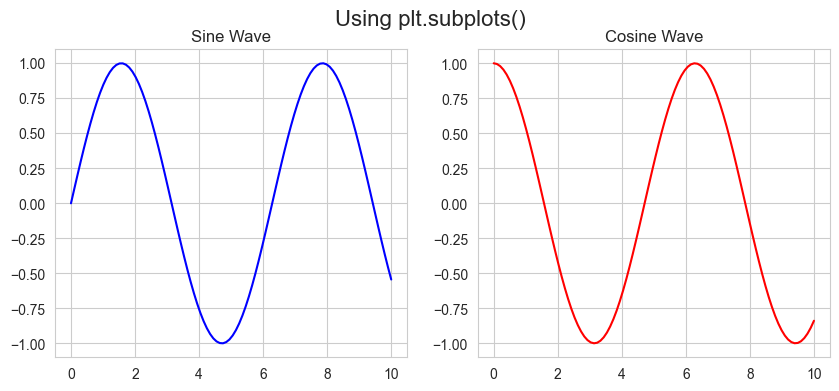

In [5]:
# Example: plt.subplots()
# We create a 1-row, 2-column grid.
# 'axes' is now a NumPy array with 2 'ax' objects: axes[0] and axes[1]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Prepare data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Plot on the first Axes (left)
axes[0].plot(x, y1, color='blue')
axes[0].set_title('Sine Wave')

# Plot on the second Axes (right)
axes[1].plot(x, y2, color='red')
axes[1].set_title('Cosine Wave')

# Add a title for the entire Figure
fig.suptitle('Using plt.subplots()', fontsize=16)

# Show the plot
plt.show()

**2. `plt.GridSpec()` (More Flexible Layouts)**

Used when you need plots of different sizes in a grid. This is more advanced and very useful for dashboards.

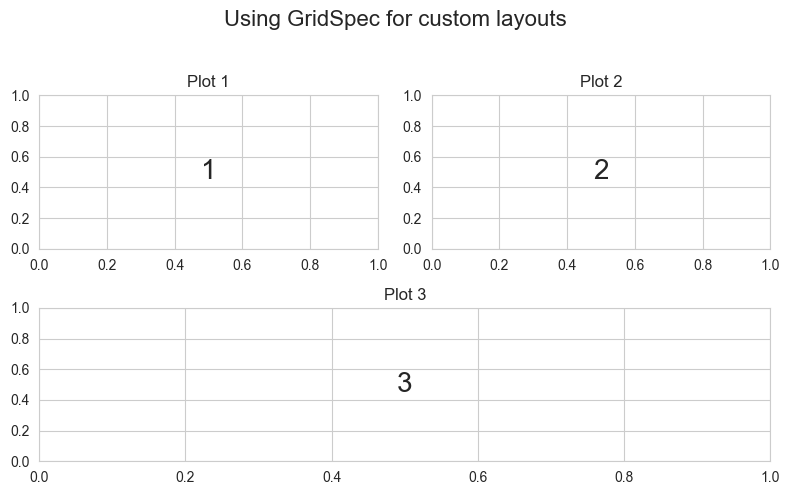

In [6]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8, 5))
gs = GridSpec(nrows=2, ncols=2, figure=fig) # Create a 2x2 grid

# Create axes
ax1 = fig.add_subplot(gs[0, 0]) # Top-left
ax1.set_title('Plot 1')
ax1.text(0.5, 0.5, '1', ha='center', va='center', fontsize=20)

ax2 = fig.add_subplot(gs[0, 1]) # Top-right
ax2.set_title('Plot 2')
ax2.text(0.5, 0.5, '2', ha='center', va='center', fontsize=20)

ax3 = fig.add_subplot(gs[1, :]) # Bottom row, spanning all columns
ax3.set_title('Plot 3')
ax3.text(0.5, 0.5, '3', ha='center', va='center', fontsize=20)

fig.suptitle('Using GridSpec for custom layouts', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout
plt.show()

**3. `plt.subplot_mosaic()` (New & Easiest)**

This is the newest and most intuitive way to create complex layouts.

(<Figure size 640x480 with 3 Axes>,
 {'A': <Axes: label='A'>, 'B': <Axes: label='B'>, 'C': <Axes: label='C'>})

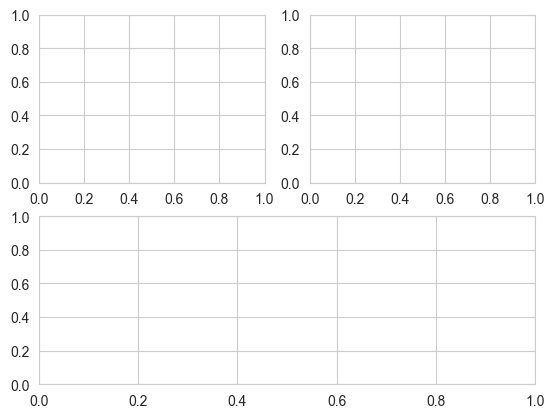

In [7]:
plt.subplot_mosaic([['A',"B"],['C',"C"]])

### 1.2. Introduction to Seaborn

* **High-Level:** Seaborn makes complex plots (like boxplots, violin plots, heatmaps) in one line of code.
* **Integrates with Pandas:** It understands Pandas DataFrames directly. You just pass the whole DataFrame and specify column names using `x="col_name"`, `y="col_name"`, `hue="group_col"`.
* **Built on Matplotlib:** A Seaborn plot *is* a Matplotlib `Axes` object. This means we can still use `ax.set_title()` to customize a Seaborn plot.

### 1.3. Chart Cheatsheet: What plot to use?

The core of data visualization is picking the right chart for your data and your question. Here is a summary table.

| Plot Type | EDA Purpose | Matplotlib Code | Seaborn Code |
| :--- | :--- | :--- | :--- |
| **Histogram** | Distribution (of one numeric variable) | `ax.hist(x)` | `sns.histplot(x)` |
| **KDE Plot** | Distribution (smooth) | `(Complex)` | `sns.kdeplot(x)` |
| **Boxplot** | Distribution & Outliers (numeric vs. cat) | `ax.boxplot(data)` | `sns.boxplot(x, y)` |
| **Violin Plot** | Distribution & Density (numeric vs. cat) | `(Complex)` | `sns.violinplot(x, y)` |
| **Strip/Swarm Plot** | Distribution (individual points) | `(Complex)` | `sns.stripplot(x, y)` |
| **Bar Chart** | Comparison / Ranking (categorical vs. numeric) | `ax.bar(x, height)` | `sns.barplot(x, y)` |
| *Horizontal Bar* | *Variant: easier labels for many categories* | `ax.barh(y, width)` | `sns.barplot(x, y, orient='h')` |
| *Stacked Bar* | *Variant: Composition / Part-to-Whole* | `ax.bar(x, y1, label='A')` `ax.bar(x, y2, bottom=y1, label='B')` | `sns.barplot(..., hue=...)` (dodge) or `df.plot(kind='bar', stacked=True)` |
| **Count Plot** | Frequency (of one categorical variable) | `ax.bar(counts.index, counts.values)` | `sns.countplot(x)` |
| **Pie Chart** | Part-to-Whole (Proportions) | `ax.pie(sizes, labels)` | `(Not recommended)` |
| *Donut Chart* | *Variant: Pie chart with a hole* | `ax.pie(...)` + `Circle()` patch | `(Not recommended)` |
| **Line Plot** | Trends (time-series) | `ax.plot(x, y)` | `sns.lineplot(x, y)` |
| *Area Chart* | *Variant: Show magnitude of trend* | `ax.fill_between(x, y)` | `sns.lineplot(...)` + `ax.fill_between(...)` |
| *Stacked Area* | *Variant: Composition over time* | `ax.stackplot(x, y1, y2, ...)` | `(Complex, easier with Pandas)` |
| **Scatter Plot** | Relationship (numeric vs. numeric) | `ax.scatter(x, y)` | `sns.scatterplot(x, y)` |
| *Bubble Chart* | *Variant: Add 3rd dimension (size)* | `ax.scatter(x, y, s=sizes)` | `sns.scatterplot(x, y, size=s_var)` |
| **Joint Plot** | Relationship & Distribution (2 variables) | `(Complex)` | `sns.jointplot(x, y)` |
| **Heatmap** | Correlation Matrix (many variables) | `ax.imshow(data)` | `sns.heatmap(data)` |
| **Pair Plot** | All pairwise relationships (matrix) | `(Complex)` | `sns.pairplot(data)` |

---

### Part 1: Review Questions

1.  **Question:** What are the two main components of a Matplotlib plot in the Object-Oriented (OO) style? What does each component represent?
    * **Answer:** The `Figure` (the overall canvas or window) and the `Axes` (the individual plot or subplot where the data is drawn). We use `fig, ax = plt.subplots()` to create them.

2.  **Question:** If you want to create a 2x3 grid of plots, what command would you use? How would you access the bottom-right plot?
    * **Answer:** You would use `fig, axes = plt.subplots(nrows=2, ncols=3)`. The `axes` object would be a 2x3 NumPy array. You would access the bottom-right plot using `axes[1, 2]` (row index 1, column index 2).

3.  **Question:** What is the main difference between `sns.barplot()` and `sns.countplot()`?
    * **Answer:** `sns.countplot()` only needs an `x` variable and *counts* the frequency of each category. `sns.barplot()` needs both an `x` (categorical) and a `y` (numeric) variable and plots an aggregate (by default, the *mean*) of `y` for each `x` category.

4.  **Explore Further:** Look up the documentation for `plt.subplot_mosaic()`. How would you use it to create a layout with one large plot 'A' on the left and two smaller plots 'B' and 'C' stacked vertically on the right?
    * **Hint:** The layout would look like `layout = """
    A B
    A C
    """` or `layout = [['A', 'B'], ['A', 'C']]`.


## Part 2: Hands-on EDA by Purpose

In this section, we will practice plotting based on our **EDA Purpose**. For each purpose, we will:
1.  Prepare data specific to that task.
2.  Plot using **Matplotlib (OO-Style)** and review its customizations.
3.  Plot using **Seaborn** and review its customizations.

This will help you compare the low-level (Matplotlib) and high-level (Seaborn) approaches.

In [8]:
# Make sure libraries are imported
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set a consistent style for all plots
sns.set_style("whitegrid")

---

### 2.1. EDA Purpose: Analyze Distribution (Single Numeric Variable)

* **Plots:** Histogram, KDE Plot
* **Goal:** Understand the shape, center, and spread of a continuous variable. Is it normal? Skewed? Bimodal?

#### 2.1.1. Matplotlib (OO-Style)

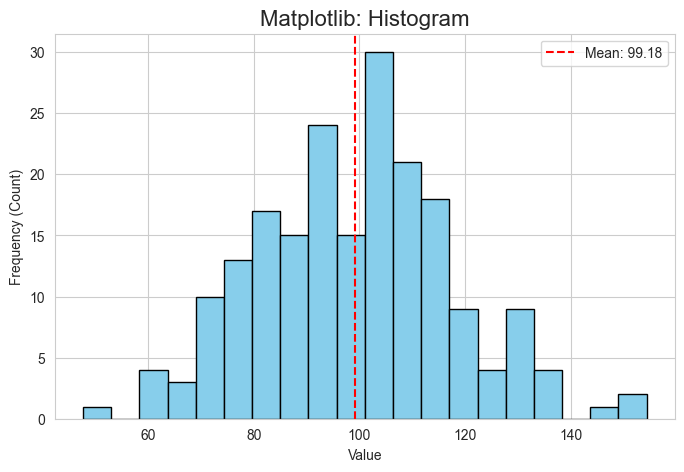

In [9]:
# 1. Prepare Data
np.random.seed(42)
data_hist = np.random.normal(100, 20, 200) # (mean, std_dev, size)

# 2. Create Figure and Axes (1 row, 1 col)
fig, ax = plt.subplots(figsize=(8, 5))

# 3. Plot
ax.hist(data_hist, bins=20, color='skyblue', edgecolor='black')

# 4. Customize
ax.set_title('Matplotlib: Histogram', fontsize=16)
ax.set_xlabel('Value')
ax.set_ylabel('Frequency (Count)')
ax.axvline(data_hist.mean(), color='red', linestyle='--', label=f'Mean: {data_hist.mean():.2f}')
ax.legend()

plt.show()

#### 2.1.2. Common Matplotlib Customizations

* `ax.hist(..., bins=N)`: Change the number of bins. This is the most important parameter to experiment with.
* `ax.hist(..., density=True)`: Normalize the histogram so the area sums to 1 (shows density, not count).
* `ax.set_xlabel()`, `ax.set_ylabel()`, `ax.set_title()`: Label your plot.
* `ax.axvline(x, color, linestyle)`: Add a vertical line, e.g., at the mean.

#### 2.1.3. Seaborn (High-Level)

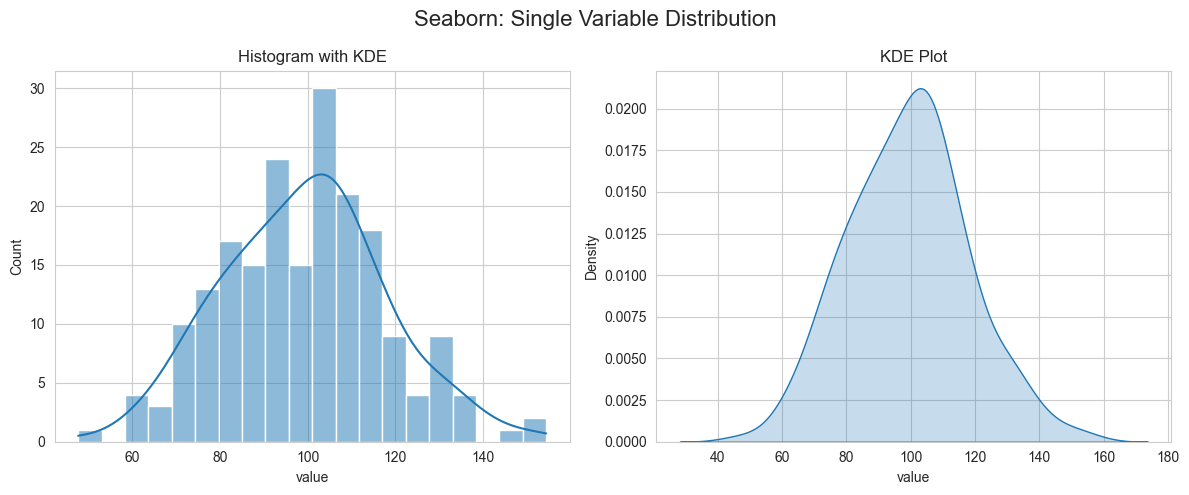

In [10]:
# 1. Prepare Data (same data, but in a DataFrame)
df_hist = pd.DataFrame({'value': data_hist})

# 2. Create Figure and Axes (1 row, 2 cols)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 3. Plot
# Plot 1: Histogram + KDE
sns.histplot(data=df_hist, x='value', bins=20, kde=True, ax=axes[0])

# Plot 2: KDE Plot only
sns.kdeplot(data=df_hist, x='value', fill=True, ax=axes[1])

# 4. Customize
fig.suptitle('Seaborn: Single Variable Distribution', fontsize=16)
axes[0].set_title('Histogram with KDE')
axes[1].set_title('KDE Plot')

plt.tight_layout()
plt.show()

#### 2.1.4. Common Seaborn Customizations

* `sns.histplot(..., kde=True)`: Automatically adds a Kernel Density Estimate (KDE) line.
* `sns.histplot(..., bins=N)`: Set number of bins.
* `sns.kdeplot(..., fill=True)`: Fills the area under the density curve.
* `sns.histplot(..., hue='category_col')`: **Powerful!** This will overlay two histograms (e.g., for males and females) on the same plot, using color to distinguish them. This is much harder to do in Matplotlib.

---

### 2.2. EDA Purpose: Compare Distributions (Numeric vs. Categorical)

* **Plots:** Boxplot, Violin Plot, Strip/Swarm Plot
* **Goal:** Compare the summary statistics (median, quartiles, range) and distribution shape of a numeric variable *across different groups*.

#### 2.2.1. Matplotlib (OO-Style)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10288\3993958343.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(data_for_boxplot, labels=labels)


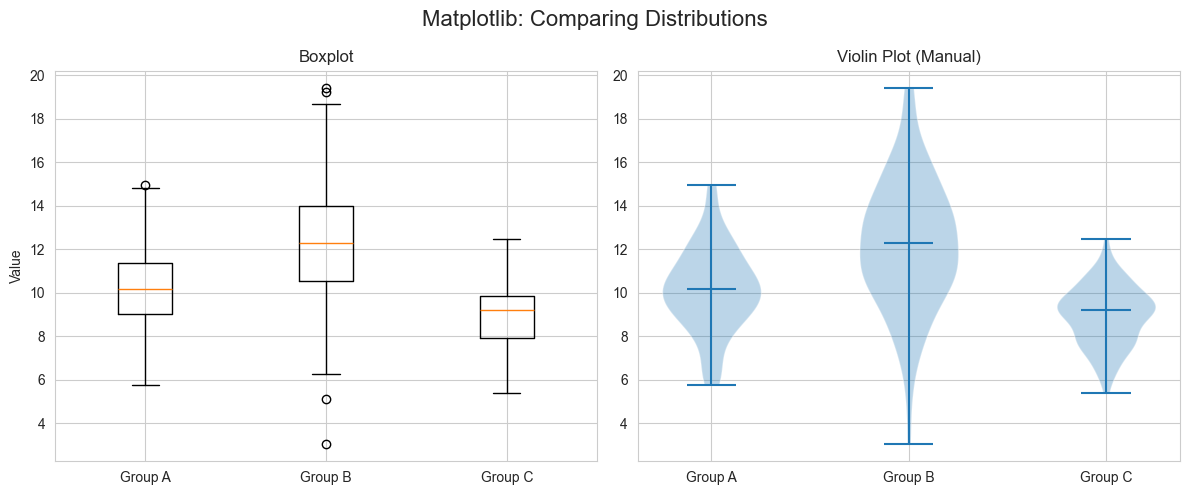

In [11]:
# 1. Prepare Data
np.random.seed(10)
group_a = np.random.normal(10, 2, 100)
group_b = np.random.normal(12, 3, 100)
group_c = np.random.normal(9, 1.5, 100)
data_for_boxplot = [group_a, group_b, group_c]
labels = ['Group A', 'Group B', 'Group C']

# 2. Create Figure and Axes (1 row, 2 cols for Hist/Box)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 3. Plot
# Plot 1: Boxplot
axes[0].boxplot(data_for_boxplot, labels=labels)

# Plot 2: Violin Plot (Manual) - This is very complex in Matplotlib!
# We typically don't do this. We just show the boxplot.
axes[1].violinplot(data_for_boxplot, showmedians=True)
axes[1].set_xticks([1, 2, 3])
axes[1].set_xticklabels(labels)

# 4. Customize
fig.suptitle('Matplotlib: Comparing Distributions', fontsize=16)
axes[0].set_title('Boxplot')
axes[0].set_ylabel('Value')
axes[1].set_title('Violin Plot (Manual)')

plt.tight_layout()
plt.show()

#### 2.2.2. Common Matplotlib Customizations

* `ax.boxplot(..., vert=False)`: Make the boxplot horizontal.
* `ax.boxplot(..., notch=True)`: Add a "notch" around the median (gives a rough CI).
* `ax.boxplot(..., patch_artist=True)`: Allows you to fill the boxes with color (requires more work).
* **Note:** Matplotlib does not have built-in swarm or strip plots. `violinplot` is possible but complex. **This is a key area where Seaborn is much better.**

#### 2.2.3. Seaborn (High-Level)

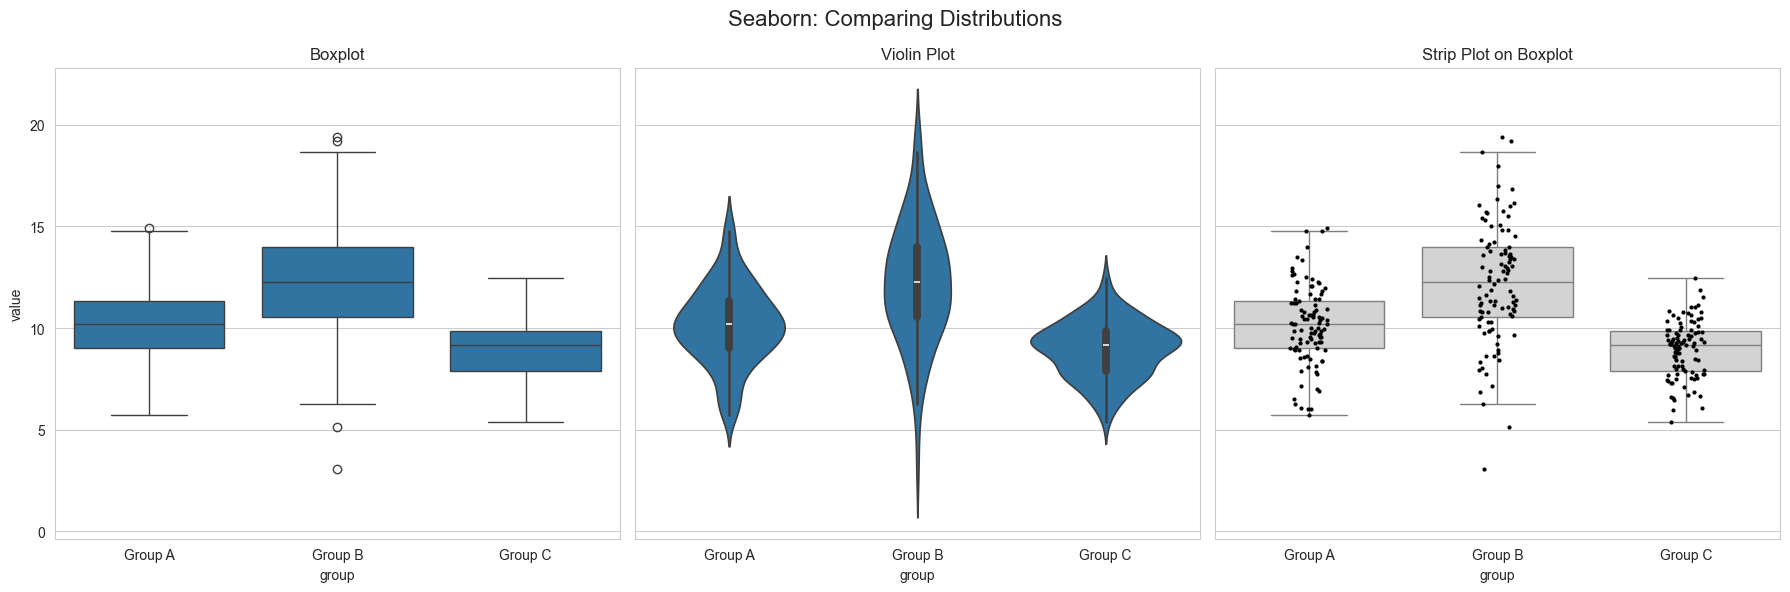

In [12]:
# 1. Prepare Data
# Seaborn prefers 'long-form' data (one row per observation)
df_groups = pd.DataFrame({
    'value': np.concatenate([group_a, group_b, group_c]),
    'group': np.repeat(labels, 100) 
})

# 2. Create Figure and Axes (1 row, 3 cols)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# 3. Plot
# Plot 1: Boxplot
sns.boxplot(data=df_groups, x='group', y='value', ax=axes[0])

# Plot 2: Violin Plot
sns.violinplot(data=df_groups, x='group', y='value', ax=axes[1])

# Plot 3: Swarm Plot (overlayed on a boxplot)
sns.boxplot(data=df_groups, x='group', y='value', ax=axes[2], color='lightgray', showfliers=False)
sns.stripplot(data=df_groups, x='group', y='value', ax=axes[2], s=3, color='black') # s=size

# 4. Customize
fig.suptitle('Seaborn: Comparing Distributions', fontsize=16)
axes[0].set_title('Boxplot')
axes[1].set_title('Violin Plot')
axes[2].set_title('Strip Plot on Boxplot')

plt.tight_layout()
plt.show()

#### 2.2.4. Common Seaborn Customizations

* `sns.boxplot(..., hue='another_group')`: **Powerful!** Creates grouped boxplots within each x-category.
* `sns.violinplot(..., inner='quartile')`: Shows quartiles inside the violin instead of the default mini-boxplot.
* `sns.stripplot(..., jitter=True)`: Adds random noise to spread out overlapping points (simpler than `swarmplot`).
* `sns.catplot(data=..., x=..., y=..., col=..., kind='box')`: A FacetGrid. Automatically creates *multiple subplots* based on a third category (e.g., one plot for 'Male', one for 'Female').

---

### 2.3. EDA Purpose 3: Comparison, Ranking & Frequency

* **Plots:** Bar Chart (Vertical/Horizontal/Stacked), Count Plot
* **Goal:** Compare a numeric value (e.g., average) across groups, or count the number of items in each group.

#### 2.3.1. Matplotlib (OO-Style)

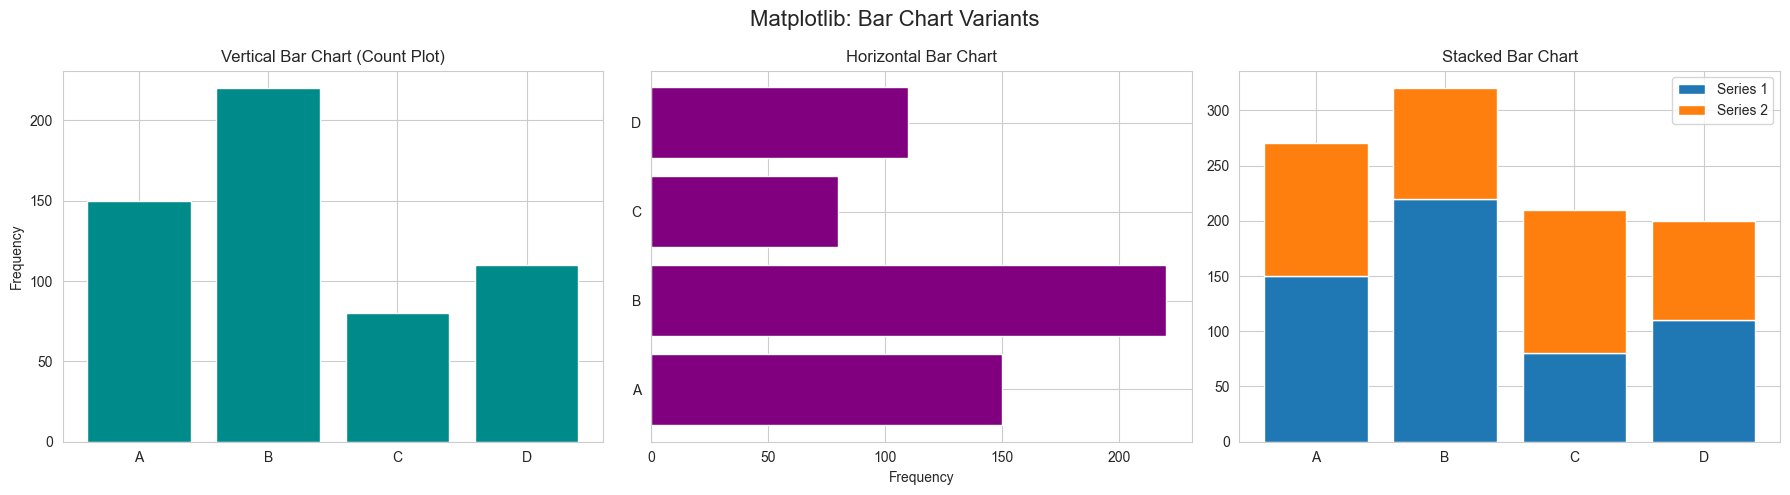

In [13]:
# 1. Prepare Data (for counts)
categories = ['A', 'B', 'C', 'D']
counts_1 = np.array([150, 220, 80, 110])
counts_2 = np.array([120, 100, 130, 90])

# 2. Create Figure and Axes (1 row, 3 cols)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 3. Plot
# Plot 1: Vertical Bar Chart
axes[0].bar(categories, counts_1, color='darkcyan')

# Plot 2: Horizontal Bar Chart
axes[1].barh(categories, counts_1, color='purple')

# Plot 3: Stacked Bar Chart
axes[2].bar(categories, counts_1, label='Series 1')
axes[2].bar(categories, counts_2, bottom=counts_1, label='Series 2')
axes[2].legend()

# 4. Customize
fig.suptitle('Matplotlib: Bar Chart Variants', fontsize=16)
axes[0].set_title('Vertical Bar Chart (Count Plot)')
axes[0].set_ylabel('Frequency')

axes[1].set_title('Horizontal Bar Chart')
axes[1].set_xlabel('Frequency')

axes[2].set_title('Stacked Bar Chart')

plt.tight_layout()
plt.show()

#### 2.3.2. Common Matplotlib Customizations

* `ax.barh(categories, counts)`: Creates a horizontal bar chart, which is often easier to read.
* `ax.bar(..., bottom=...)`: The key parameter for stacking. The bottom of the 2nd series is the top of the 1st.
* `ax.set_xticklabels(labels, rotation=45)`: Rotate x-axis labels if they overlap.
* `ax.text(x, y, 'string')`: Manually add text labels (e.g., values) on top of each bar.

#### 2.3.3. Seaborn (High-Level)

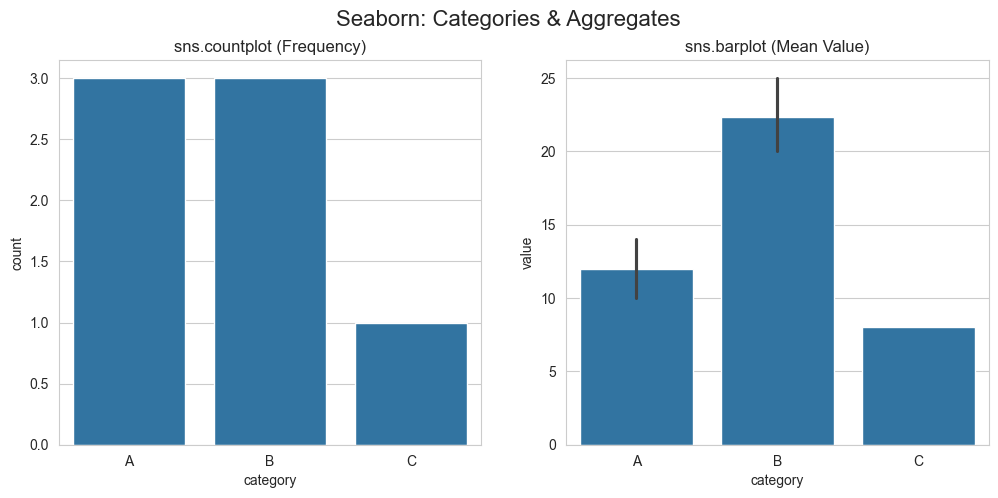

--- Stacked Bar Chart (using Pandas) ---


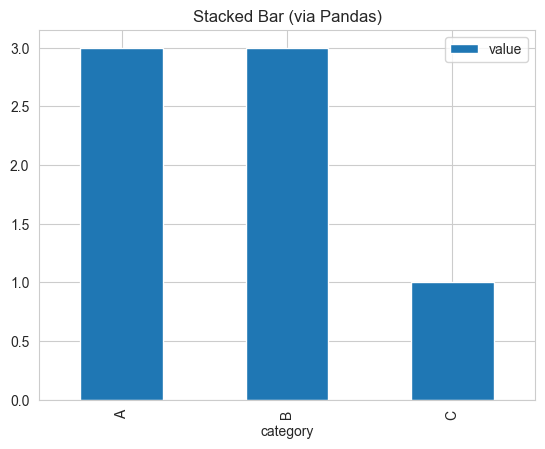

In [14]:
# 1. Prepare Data
# Seaborn works best with raw, 'long-form' data
df_cat = pd.DataFrame({
    'category': ['A', 'A', 'B', 'B', 'B', 'C', 'A'],
    'value': [10, 12, 20, 22, 25, 8, 14]
})

# 2. Create Figure and Axes (1 row, 2 cols)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 3. Plot
# Plot 1: Count Plot (Frequency of 'category')
sns.countplot(data=df_cat, x='category', ax=axes[0])

# Plot 2: Bar Plot (Shows mean of 'value' for each 'category')
# Note the black error bars: they are confidence intervals
sns.barplot(data=df_cat, x='category', y='value', ax=axes[1])

# 4. Customize
fig.suptitle('Seaborn: Categories & Aggregates', fontsize=16)
axes[0].set_title('sns.countplot (Frequency)')
axes[1].set_title('sns.barplot (Mean Value)')

plt.show()

# --- Stacked Bar in Seaborn ---
# Seaborn does not have a *simple* function for stacked bars.
# The easiest way is to use pandas .plot() after a pivot.
print("--- Stacked Bar Chart (using Pandas) ---")
df_stacked = df_cat.groupby('category').count() # Example, not very useful data
df_stacked.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Stacked Bar (via Pandas)')
plt.show()

#### 2.3.4. Common Seaborn Customizations

* `sns.countplot(..., order=...)`: Specify the order of the bars (e.g., `df['col'].value_counts().index`).
* `sns.barplot(..., ci=None)`: Turn off the confidence interval (error bars).
* `sns.barplot(..., estimator=np.sum)`: Change the aggregation function from `mean` (default) to `sum` or another function.
* `sns.barplot(..., hue='group')`: Creates **grouped (dodged)** bar charts, *not* stacked charts.

---

### 2.4. EDA Purpose 4: Analyze Part-to-Whole (Proportions)

* **Plots:** Pie Chart, Donut Chart
* **Goal:** Show how a whole is divided into parts. 
* **Warning (from Lesson 10):** Humans are bad at judging angles. A bar chart is almost always better. Use these sparingly!

#### 2.4.1. Matplotlib (OO-Style)

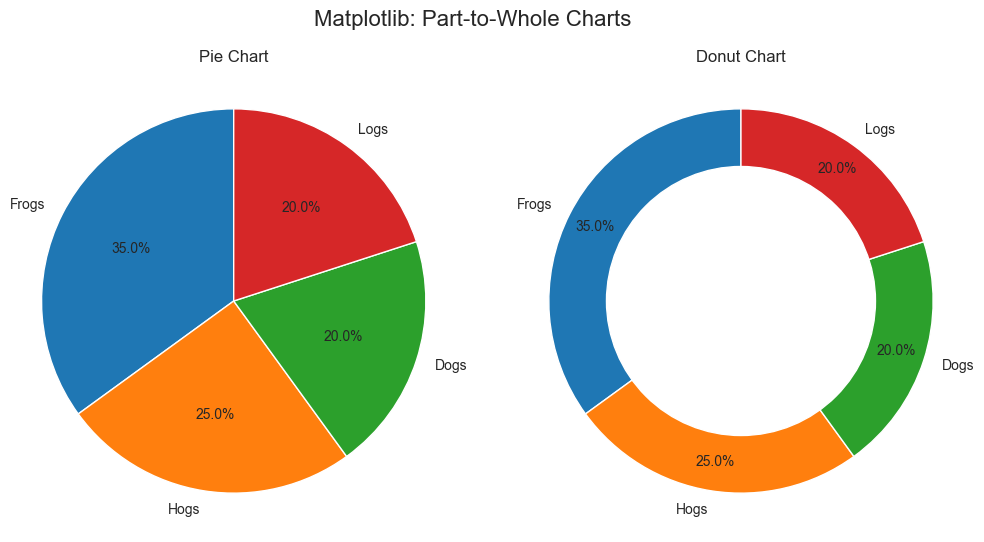

In [15]:
# 1. Prepare Data
sizes = [35, 25, 20, 20]
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
explode = (0.1, 0, 0, 0)  # only "explode" the 1st slice (Frogs)

# 2. Create Figure and Axes (1 row, 2 cols)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 3. Plot
# Plot 1: Pie Chart
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot 2: Donut Chart
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
axes[1].axis('equal')
# Draw a white circle in the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[1].add_artist(centre_circle)

# 4. Customize
fig.suptitle('Matplotlib: Part-to-Whole Charts', fontsize=16)
axes[0].set_title('Pie Chart')
axes[1].set_title('Donut Chart')

plt.show()

#### 2.4.2. Common Matplotlib Customizations

* `ax.pie(..., autopct='%1.1f%%')`: Add percentage labels.
* `ax.pie(..., explode=...)`: Emphasize one slice by 'exploding' it.
* `ax.pie(..., pctdistance=...)`: Set the radius at which the percentages are drawn.
* **Donut Chart:** As seen above, a Donut chart is just a Pie chart with a white `plt.Circle` drawn on top.

#### 2.4.3. Seaborn (High-Level)

Seaborn **does not have** a dedicated function for pie or donut charts. This is a deliberate design choice, as the library's creators (and most data viz experts) believe these charts are poor ways to represent data. They recommend using a `sns.barplot()` or `sns.countplot()` instead.

---

### 2.5. EDA Purpose 5: Analyze Relationships (Numeric vs. Numeric)

**Plots:** Scatter Plot, Bubble Chart, Joint Plot
**Goal:** Check for correlation, linearity, and clusters between two continuous variables. A bubble chart adds a third numeric variable as *size*.

#### 2.5.1. Matplotlib (OO-Style)

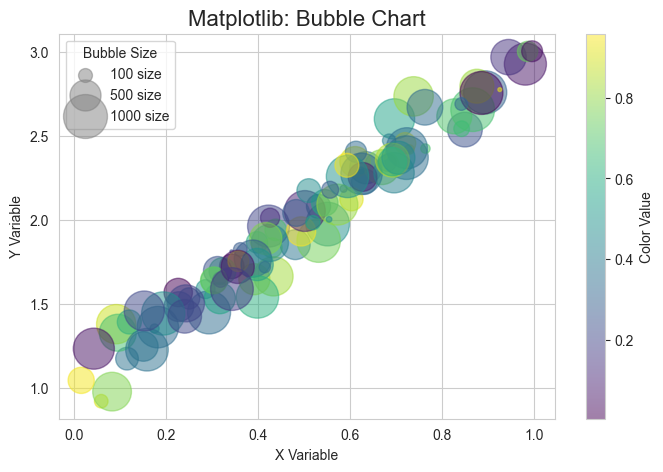

In [16]:
# 1. Prepare Data
np.random.seed(123)
x_scatter = np.random.rand(100)
y_scatter = 2 * x_scatter + 1 + np.random.normal(0, 0.1, 100)
sizes = np.random.rand(100) * 1000 # 3rd variable for size
colors = np.random.rand(100)      # 4th variable for color

# 2. Create Figure and Axes
fig, ax = plt.subplots(figsize=(8, 5))

# 3. Plot (This is a Bubble Chart)
scatter = ax.scatter(x_scatter, y_scatter, 
                     s=sizes,          # s = size (Bubble)
                     c=colors,         # c = color
                     alpha=0.5,        # transparency
                     cmap='viridis')   # colormap for 'c'

# 4. Customize
ax.set_title('Matplotlib: Bubble Chart', fontsize=16)
ax.set_xlabel('X Variable')
ax.set_ylabel('Y Variable')

# Add a color bar to show what 'c' values mean
fig.colorbar(scatter, ax=ax, label='Color Value')

# Create a custom legend for sizes (this is manual)
for s in [100, 500, 1000]:
    ax.scatter([], [], s=s, label=f'{s} size', color='gray', alpha=0.5)
ax.legend(title='Bubble Size')

plt.show()

#### 2.5.2. Common Matplotlib Customizations

* `ax.scatter(..., s=...)`: **(Bubble Chart)** Control point size based on a variable.
* `ax.scatter(..., c=...)`: Control point color (can be a single color or a variable).
* `ax.scatter(..., alpha=...)`: Control transparency, very useful for *overplotting* (many points stacked on top of each other).
* `ax.scatter(..., marker='x')`: Change the marker style (e.g., 'o', '+', 'x', '^').
* **Note:** `Jointplot` is complex and not a single function.

#### 2.5.3. Seaborn (High-Level)

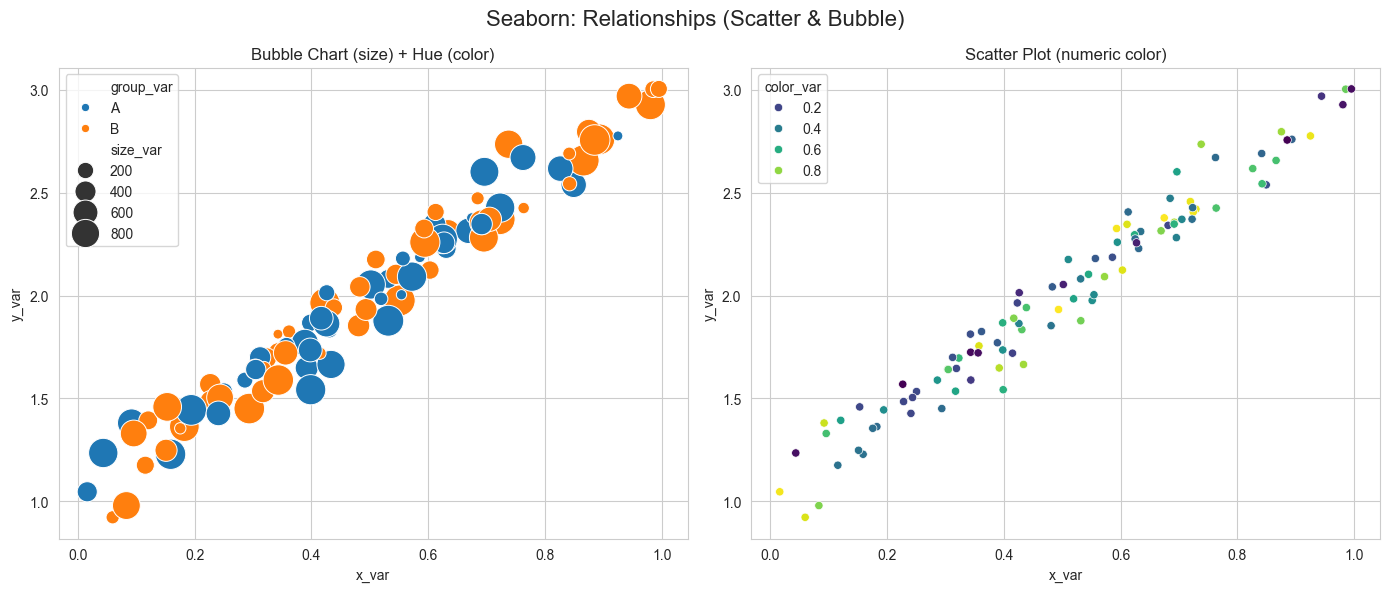

--- Seaborn Jointplot (Scatter + Histograms) ---


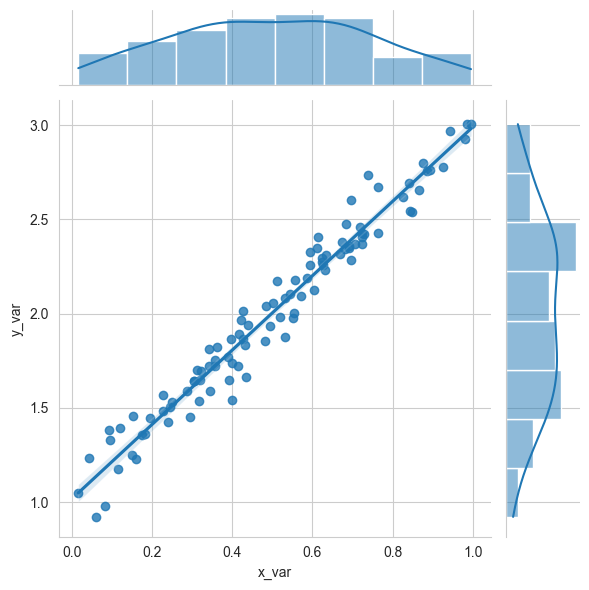

In [17]:
# 1. Prepare Data
# Seaborn works best with DataFrames
df_scatter = pd.DataFrame({
    'x_var': x_scatter,
    'y_var': y_scatter,
    'size_var': sizes,
    'color_var': colors,
    'group_var': np.random.choice(['A', 'B'], 100)
})

# 2. Create Figure and Axes (1 row, 2 cols)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 3. Plot
# Plot 1: Bubble Chart with Hue (Categorical)
sns.scatterplot(data=df_scatter, x='x_var', y='y_var', 
                hue='group_var',   # color by group (categorical)
                size='size_var',   # size by variable (numeric) -> This makes it a Bubble Chart
                ax=axes[0],
                sizes=(50, 500)) # min and max bubble size

# Plot 2: Scatter Plot with Color (Numeric)
sns.scatterplot(data=df_scatter, x='x_var', y='y_var', 
                hue='color_var',   # color by variable (numeric)
                palette='viridis', # Colormap for numeric hue
                ax=axes[1])

# 4. Customize
fig.suptitle('Seaborn: Relationships (Scatter & Bubble)', fontsize=16)
axes[0].set_title('Bubble Chart (size) + Hue (color)')
axes[1].set_title('Scatter Plot (numeric color)')

plt.tight_layout()
plt.show()

# SPECIAL PLOT: sns.jointplot
# This plot creates its own Figure and Axes, so it's called differently.
print("--- Seaborn Jointplot (Scatter + Histograms) ---")
sns.jointplot(data=df_scatter, x='x_var', y='y_var', kind='reg')
plt.show()

#### 2.5.4. Common Seaborn Customizations

* `sns.scatterplot(..., size=...)`: **(Bubble Chart)** Vary point size by a numeric variable. Automatically creates a size legend.
* `sns.scatterplot(..., hue=...)`: Color points by a categorical variable (creates a legend) or a numeric variable (creates a color bar).
* `sns.scatterplot(..., style=...)`: Vary marker style by a categorical variable.
* `sns.regplot(...)`: A quick way to add a linear regression line and confidence interval.
* `sns.jointplot(..., kind='hex')`: Use hexagonal binning for very dense (overplotted) data.

---

### 2.6. EDA Purpose 6: Analyze Trends (Time-Series)

**Plots:** Line Plot, Area Chart, Stacked Area Chart
**Goal:** See how a numeric variable (or its components) changes over an ordered sequence (like time).

#### 2.6.1. Matplotlib (OO-Style)

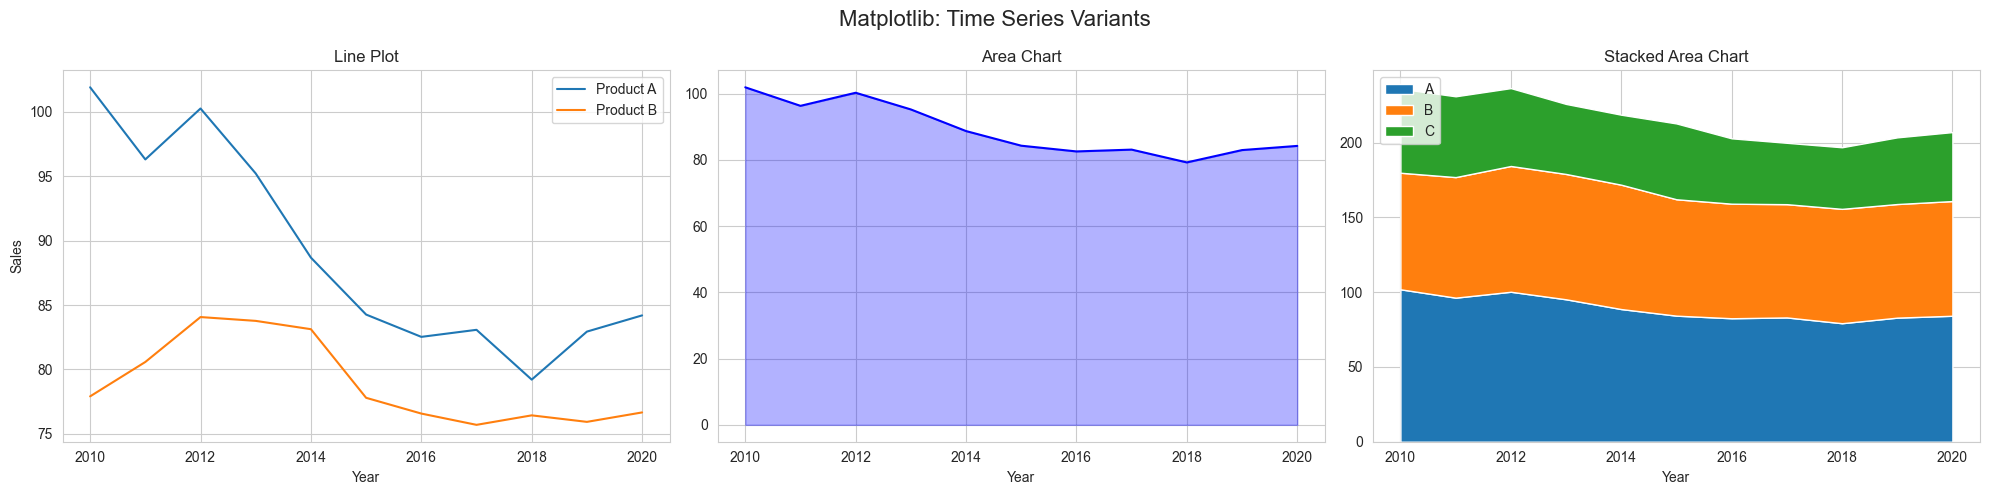

In [18]:
# 1. Prepare Data
dates = np.arange(2010, 2021)
sales_a = 100 + np.random.randn(11).cumsum() * 5
sales_b = 80 + np.random.randn(11).cumsum() * 3
sales_c = 50 + np.random.randn(11).cumsum() * 4

# 2. Create Figure and Axes (1 row, 3 cols)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# 3. Plot
# Plot 1: Line Plot
axes[0].plot(dates, sales_a, label='Product A')
axes[0].plot(dates, sales_b, label='Product B')
axes[0].legend()

# Plot 2: Area Chart (use fill_between)
axes[1].plot(dates, sales_a, label='Product A', color='blue')
axes[1].fill_between(dates, sales_a, color='blue', alpha=0.3) # Fill area under the line

# Plot 3: Stacked Area Chart
axes[2].stackplot(dates, sales_a, sales_b, sales_c, labels=['A', 'B', 'C'])
axes[2].legend(loc='upper left')

# 4. Customize
fig.suptitle('Matplotlib: Time Series Variants', fontsize=16)
axes[0].set_title('Line Plot')
axes[0].set_ylabel('Sales')
axes[1].set_title('Area Chart')
axes[2].set_title('Stacked Area Chart')

for ax in axes: ax.set_xlabel('Year')
plt.tight_layout()
plt.show()

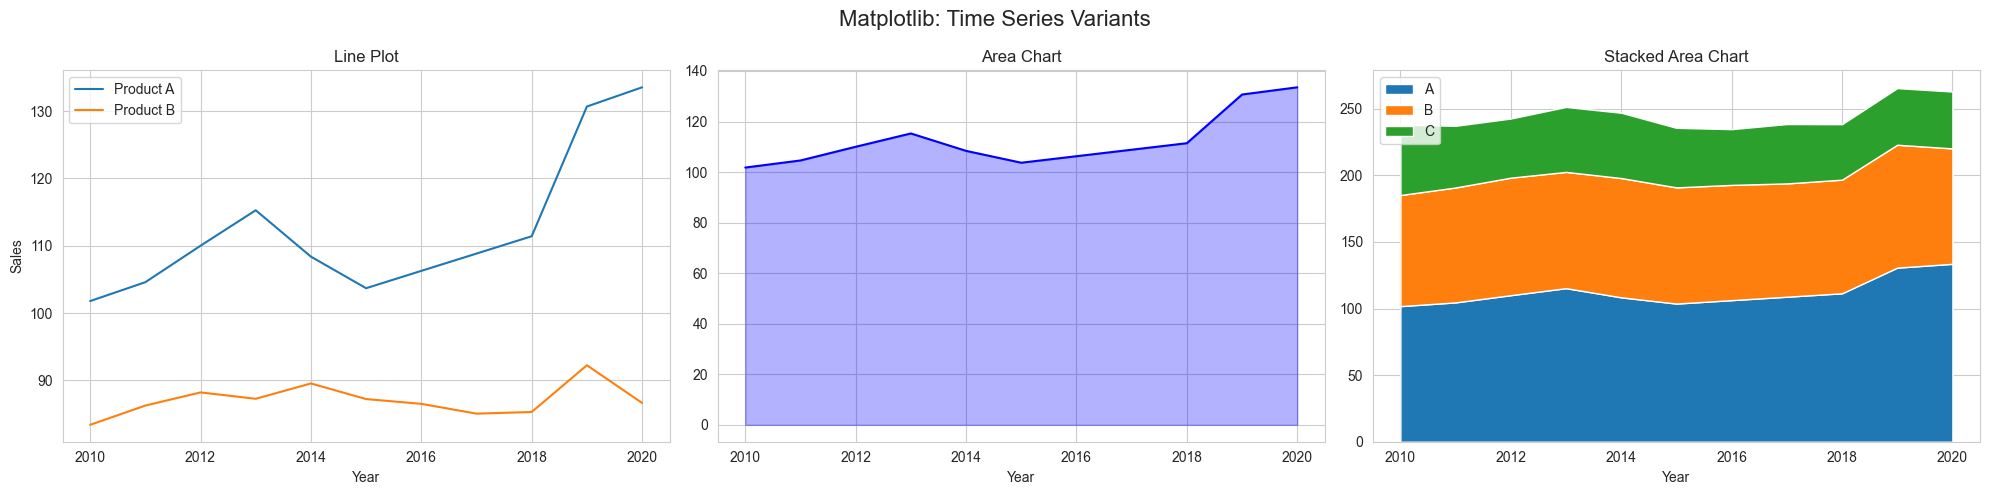

In [50]:
# 1. Prepare Data
dates = np.arange(2010, 2021)
sales_a = 100 + np.random.randn(11).cumsum() * 5
sales_b = 80 + np.random.randn(11).cumsum() * 3
sales_c = 50 + np.random.randn(11).cumsum() * 4

# 2. Create Figure and Axes (1 row, 3 cols)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# 3. Plot
# Plot 1: Line Plot
axes[0].plot(dates, sales_a, label='Product A')
axes[0].plot(dates, sales_b, label='Product B')
axes[0].legend()

# Plot 2: Area Chart (use fill_between)
axes[1].plot(dates, sales_a, label='Product A', color='blue')
axes[1].fill_between(dates, sales_a, color='blue', alpha=0.3) # Fill area under the line

# Plot 3: Stacked Area Chart
axes[2].stackplot(dates, sales_a, sales_b, sales_c, labels=['A', 'B', 'C'])
axes[2].legend(loc='upper left')

# 4. Customize
fig.suptitle('Matplotlib: Time Series Variants', fontsize=16)
axes[0].set_title('Line Plot')
axes[0].set_ylabel('Sales')
axes[1].set_title('Area Chart')
axes[2].set_title('Stacked Area Chart')

for ax in axes: ax.set_xlabel('Year')
plt.tight_layout()
plt.show()

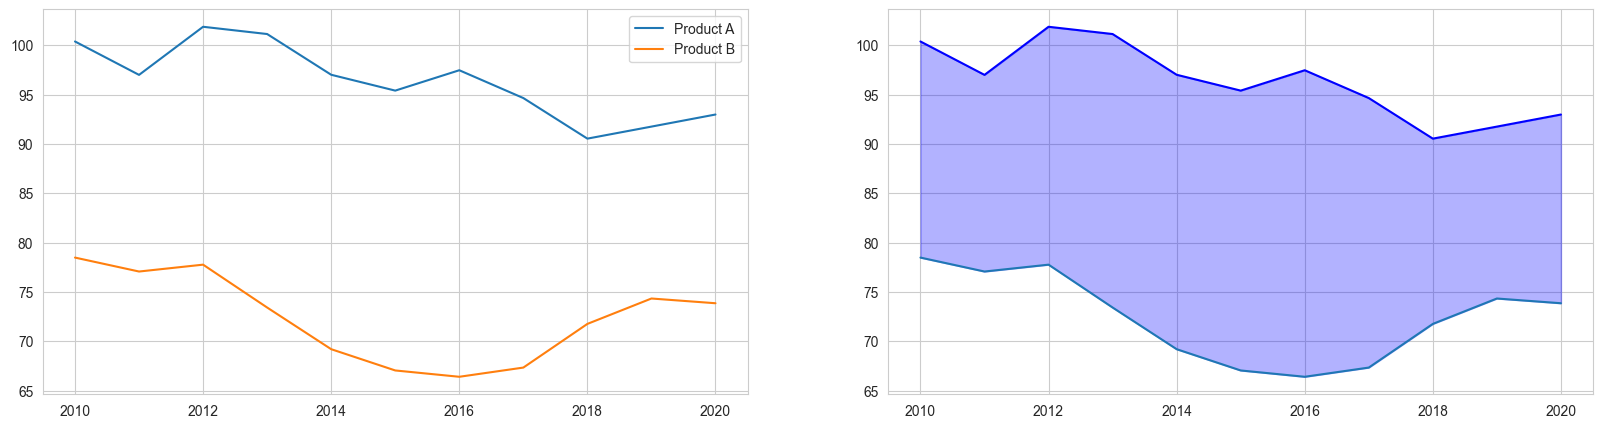

In [55]:
# 1. Prepare Data
# 2. Create Figure and Axes (1 row, 3 cols)
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# 3. Plot
# Plot 1: Line Plot
axes[0].plot(dates, sales_a, label='Product A')
axes[0].plot(dates, sales_b, label='Product B')
axes[0].legend()

# Plot 2: Area Chart (use fill_between)
axes[1].plot(dates, sales_a, label='Product A', color='blue')
axes[1].fill_between(x = dates, y1 = sales_a, y2= sales_b, color='blue', alpha=0.3) # Fill area under the line
axes[1].plot(dates, sales_b, label='Product B');

#### 2.6.2. Common Matplotlib Customizations

* `ax.plot(..., linestyle='--')`: Change line style (e.g., '--', ':', '-.').
* `ax.plot(..., marker='o')`: Add markers to each data point.
* `ax.fill_between(x, y, alpha=0.3)`: **(Area Chart)** Fills the area under the line with transparency.
* `ax.stackplot(x, y1, y2, ...)`: **(Stacked Area Chart)** Automatically stacks multiple series on top of each other.

#### 2.6.3. Seaborn (High-Level)

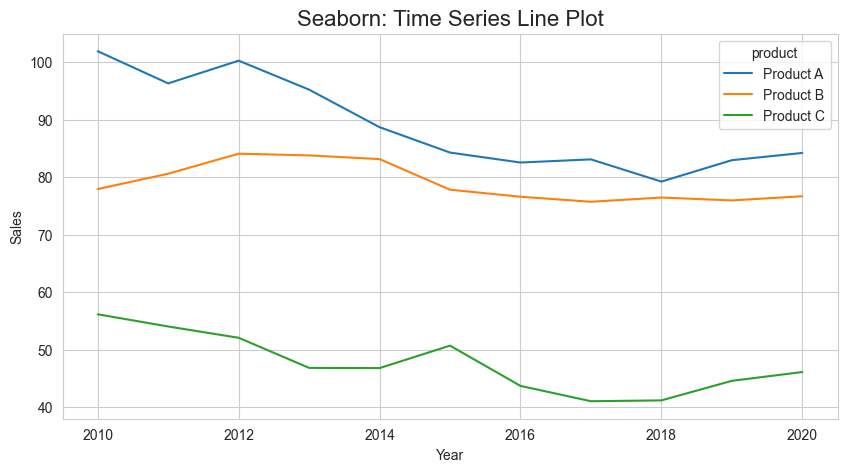

In [ ]:
# 1. Prepare Data
# Seaborn needs 'long-form' data
df_a = pd.DataFrame({'year': dates, 'sales': sales_a, 'product': 'Product A'})
df_b = pd.DataFrame({'year': dates, 'sales': sales_b, 'product': 'Product B'})
df_c = pd.DataFrame({'year': dates, 'sales': sales_c, 'product': 'Product C'})
df_stocks = pd.concat([df_a, df_b, df_c])

# 2. Create Figure and Axes
fig, ax = plt.subplots(figsize=(10, 5))

# 3. Plot (Seaborn lineplot)
sns.lineplot(data=df_stocks, x='year', y='sales', hue='product', ax=ax)

# 4. Customize
ax.set_title('Seaborn: Time Series Line Plot', fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('Sales')

plt.show()

# Note: Seaborn doesn't have a direct 'stackplot' or 'areaplot'.
# You typically use Matplotlib's `ax.stackplot` (as shown before) or `ax.fill_between`.

#### 2.6.4. Common Seaborn Customizations

* `sns.lineplot(..., hue=...)`: Automatically plots multiple lines based on a category.
* `sns.lineplot(..., style=...)`: Changes the line *style* (e.g., dashed, dotted) based on a category.
* `sns.lineplot(..., ci='sd')`: Shows the standard deviation as a shaded band (default is 95% CI).
* `sns.lineplot(...)` + `ax.fill_between(...)`: To create an area chart in Seaborn, you plot the line, then use Matplotlib's `fill_between` on the same `ax`.

---

### 2.7. EDA Purpose 7: Analyze All Numeric Relationships (Matrix)

* **Plots:** Heatmap, Pairplot
* **Goal:** Get a quick overview of the relationships between *all* numeric variables at once.

#### 2.7.1. Matplotlib (OO-Style)

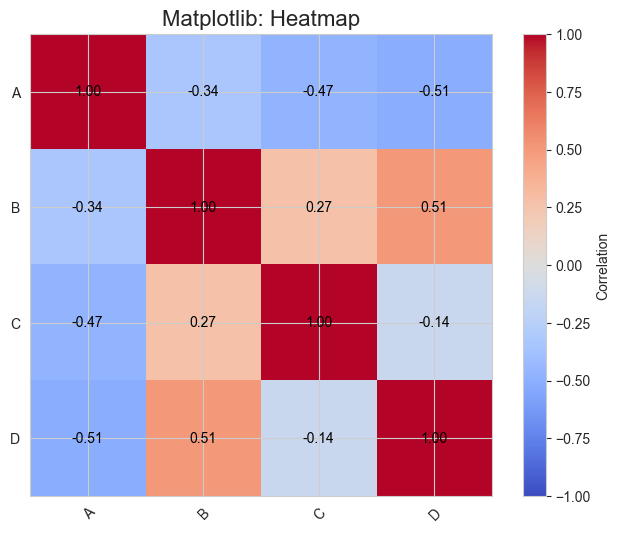

Pandas Scatter Matrix (Matplotlib backend)


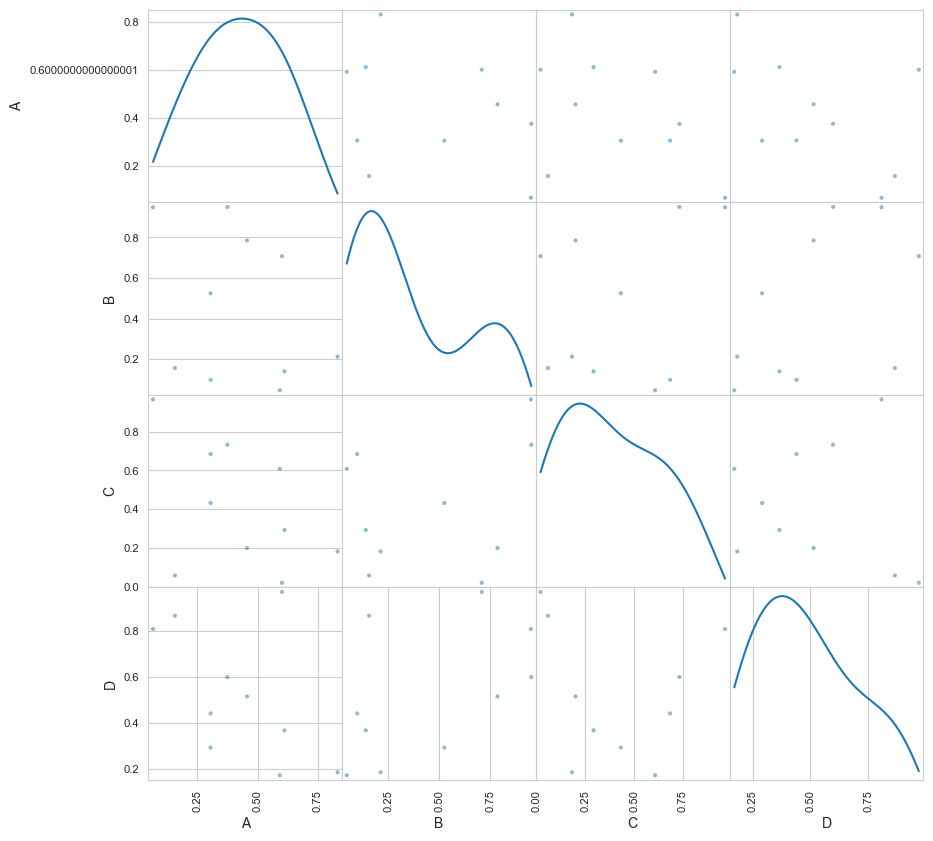

In [20]:
# 1. Prepare Data
np.random.seed(42)
data_matrix = pd.DataFrame(np.random.rand(10, 4), columns=['A', 'B', 'C', 'D'])
corr_matrix = data_matrix.corr()

# 2. Create Figure and Axes (1 for heatmap, 1 for scatter matrix)
fig, ax1 = plt.subplots(figsize=(8, 6))

# 3. Plot (Heatmap)
im = ax1.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# 4. Customize Heatmap
ax1.set_title('Matplotlib: Heatmap', fontsize=16)
fig.colorbar(im, ax=ax1, label='Correlation')
ax1.set_xticks(np.arange(len(corr_matrix.columns)))
ax1.set_yticks(np.arange(len(corr_matrix.columns)))
ax1.set_xticklabels(corr_matrix.columns)
ax1.set_yticklabels(corr_matrix.columns)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add text annotations (the hard part in matplotlib)
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax1.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")

plt.show()

# Plot 2: Pairplot (Scatter Matrix) using pandas plotting
print("Pandas Scatter Matrix (Matplotlib backend)")
pd.plotting.scatter_matrix(data_matrix, figsize=(10, 10), diagonal='kde')
plt.show()

#### 2.7.2. Common Matplotlib Customizations

* `ax.imshow(..., cmap=...)`: The most important parameter. Sets the colormap (e.g., 'viridis', 'coolwarm', 'Reds').
* `ax.imshow(..., vmin=-1, vmax=1)`: Fixes the color scale to a specific range (essential for correlation matrices).
* `ax.text(...)`: As seen above, adding text annotations is a manual, iterative process.
* `pd.plotting.scatter_matrix(..., diagonal='kde')`: Changes the diagonal plots from histograms (default) to KDE plots.

#### 2.7.3. Seaborn (High-Level)

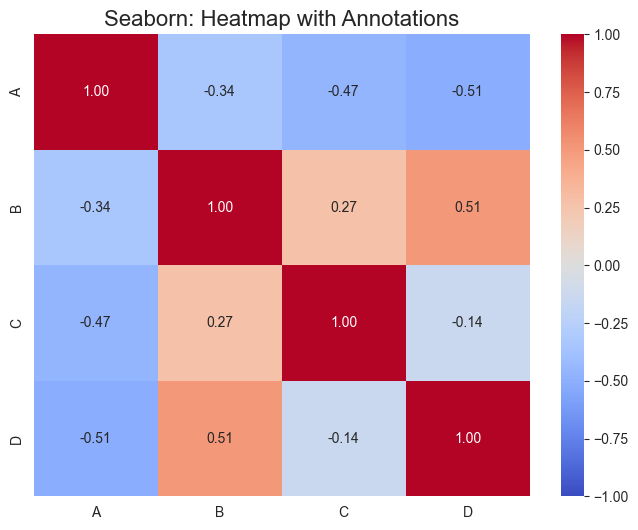

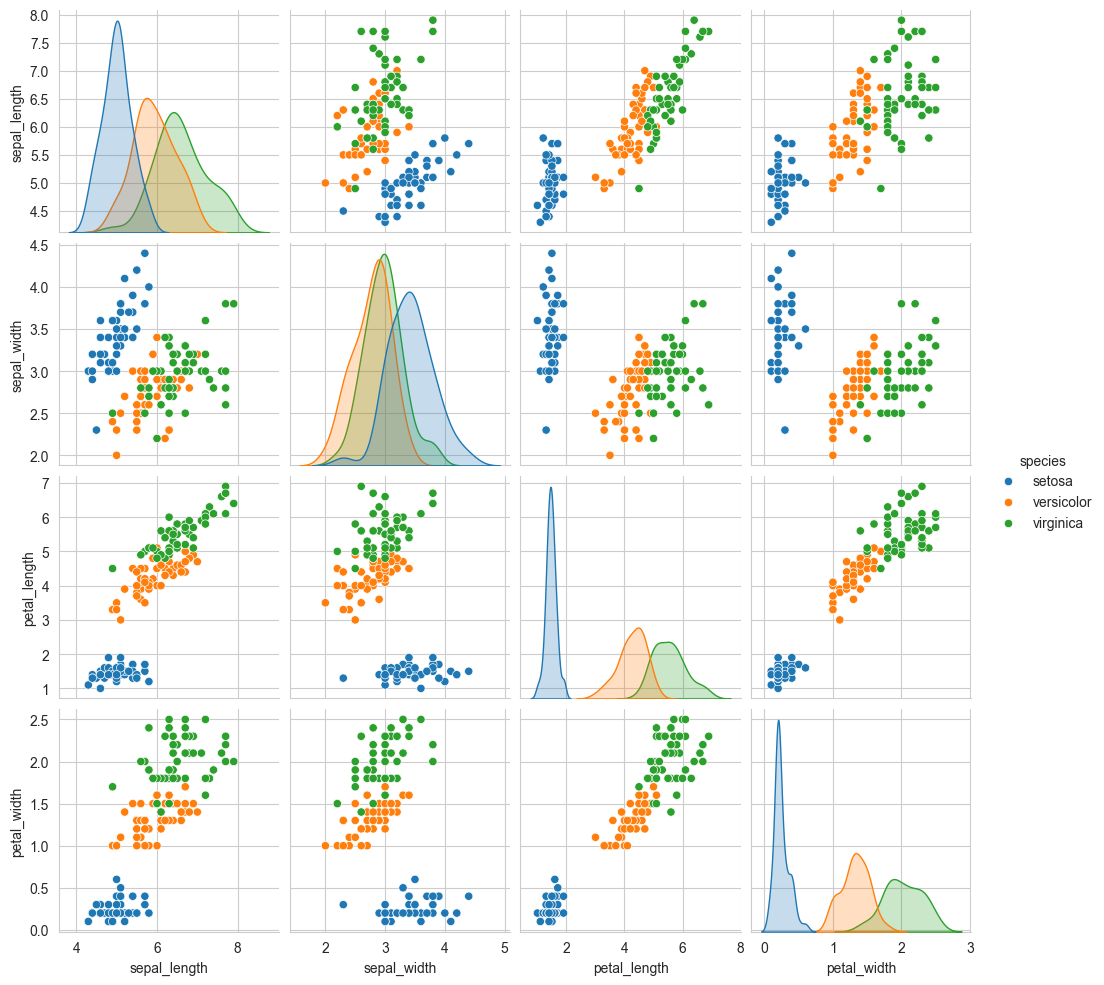

In [21]:
# 1. Prepare Data (same correlation matrix)
# corr_matrix = data_matrix.corr()

# 2. Create Figure and Axes
fig, ax = plt.subplots(figsize=(8, 6))

# 3. Plot (Heatmap)
# Seaborn's heatmap is much simpler and more powerful
sns.heatmap(corr_matrix, 
            annot=True,     # Show the correlation values
            fmt=".2f",      # Format values to 2 decimal places
            cmap='coolwarm',  # Colormap
            vmin=-1, vmax=1, # Fix color scale
            ax=ax)

# 4. Customize
ax.set_title('Seaborn: Heatmap with Annotations', fontsize=16)

plt.show()

# SPECIAL PLOT: sns.pairplot
# This is a key EDA tool. It creates its own Figure, so we call it directly.
# It creates scatterplots for all numeric pairs and histograms on the diagonal.
df_pairplot = sns.load_dataset('iris')
sns.pairplot(df_pairplot, hue='species')
plt.show()

#### 2.7.4. Common Seaborn Customizations

* `sns.heatmap(..., annot=True)`: The killer feature. Automatically writes the data value in each cell.
* `sns.heatmap(..., fmt=".2f")`: String formatting for the annotations.
* `sns.heatmap(..., cmap=...)`: Change colormap.
* `sns.pairplot(..., hue=...)`: Colors the points by a category, which is extremely useful.
* `sns.pairplot(..., kind='reg')`: Adds regression lines to the scatterplots.
* `sns.pairplot(..., corner=True)`: Saves space by only plotting the lower triangle of the matrix (since the upper is a mirror image).

---

### Part 2: Review Questions

1.  **Question:** What is the key parameter to create a **Bubble Chart** in Matplotlib (`ax.scatter`) and Seaborn (`sns.scatterplot`)?
    * **Answer:** The `s` (size) parameter. In Seaborn, you pass a column name (e.g., `size='my_size_column'`) and it automatically scales the bubbles and creates a legend. In Matplotlib, you pass an array of values (e.g., `s=my_size_array`).

2.  **Question:** What is the difference between an **Area Chart** and a **Stacked Area Chart**? When would you use each?
    * **Answer:** An **Area Chart** (`ax.fill_between`) is just a line chart with the area underneath it shaded. It's good for showing the magnitude of a single trend. A **Stacked Area Chart** (`ax.stackplot`) plots several series stacked on top of each other. It's used to show how a *total* is divided into *parts* over time.

3.  **Question:** How do you create a **Donut Chart** using Matplotlib?
    * **Answer:** You first create a normal `ax.pie()` chart. Then, you create a white circle shape (`plt.Circle((0, 0), 0.7, fc='white')`) and add it to the plot's axes (`ax.add_artist(centre_circle)`), which covers the center and creates the 'hole'.

4.  **Explore Further:** Look at the `sns.catplot()` function. Notice it's not in our cheatsheet. Why? 
    * **Hint:** `catplot` is not one type of plot. It's a *Figure-level function* (like `jointplot` and `pairplot`) that lets you create many different *categorical* plots (like `boxplot`, `violinplot`, `barplot`, `stripplot`, etc.) by using the `kind=` parameter. Its main power is creating facetted plots by using `col=` and `row=`.
    * **Try this:** `sns.catplot(data=df_groups, x='group', y='value', col='some_other_category', kind='box')`


## Part 3: Creating Explanatory Charts (Data Storytelling)

Now we move from **Exploratory (EDA)** to **Explanatory (Storytelling)**.

* **EDA Goal:** To find insights (for *yourself*). Charts can be messy.
* **Explanatory Goal:** To communicate *one specific insight* to an audience (for *others*). Charts must be clean, simple, and focused.

This means we must **be the editor**. We choose *one* story and remove everything else.

In [22]:
# Make sure libraries are imported
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set a consistent style for all plots
sns.set_style("whitegrid")

### 3.1. Review of Design Principles (from Lesson 10)

To go from EDA to Explanatory, we apply the principles from Lesson 10.

**1. Gestalt Principles (How we see groups):**
These principles explain *why* good design works. We use them to our advantage.
* **Proximity:** We group things that are close together. 
    * *Technique:* Placing two related bar charts side-by-side.
* **Similarity:** We group things that look the same.
    * *Technique:* Using the same color for all bars in one category (e.g., "Past Years") and a different color for "This Year".
* **Enclosure:** We group things inside a boundary.
    * *Technique:* Adding a shaded box (`ax.axvspan`, `ax.get_patch) around a specific period on a line chart (e.g., "Recession Period").
* **Connection:** We group things that are physically connected.
    * *Technique:* Using a line in a line chart connects individual points into a single trend.

**2. Declutter (Removing Noise):**
This is the most important step! Your audience has limited attention. If your chart is cluttered, they won't know where to look.
* **Technique:** Remove chart borders (`ax.spines['top'].set_visible(False)`), heavy gridlines (`ax.grid(False)` or `sns.despine()`), unnecessary tick labels, and default legends.

**3. Preattentive Attributes (Focusing Attention):**
After decluttering, we must guide the audience's eye to our main point.
* **Techniques:**
    * **Color:** The most powerful. Use the "Gray-out" technique: make everything else gray and use one bold color for your story.
    * **Size:** Make important things bigger.
    * **Text/Annotation:** Add text (`ax.text()` or `ax.annotate()`) directly on the chart to state your conclusion. A good explanatory chart doesn't need a paragraph below it to be understood.

---

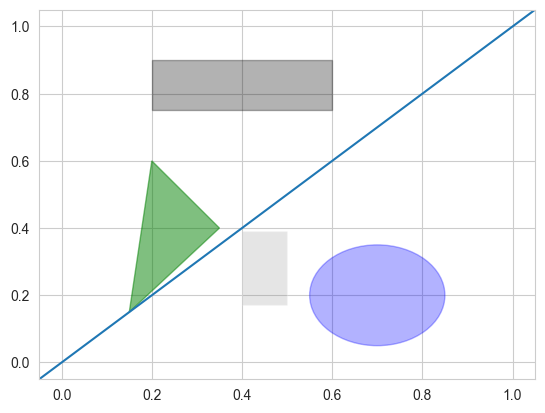

In [23]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
ax.axvspan(xmin=0.4,xmax=0.5,ymin=0.2,ymax=0.4, facecolor = 'grey', alpha = 0.2)
ax.axline(xy1=(0,0), xy2=(1,1));

### 3.2. Practical Example 1: Bar Chart

**Story:** We want to show that **Group B** performed significantly better than all other groups.

**Data:** We will use the 'long-form' categorical data from Part 2, which shows the *mean* value for 3 groups.

In [24]:
# 1. Prepare Data
np.random.seed(10)
group_a = np.random.normal(10, 2, 100)
group_b = np.random.normal(15, 3, 100) # Made Group B higher
group_c = np.random.normal(9, 1.5, 100)
labels = ['Group A', 'Group B', 'Group C']

df_groups_bar = pd.DataFrame({
    'value': np.concatenate([group_a, group_b, group_c]),
    'group': np.repeat(labels, 100) 
})

#### Step 1: The EDA Plot (Exploratory)

This is the default `sns.barplot`. It's fine for exploration, but it's cluttered and doesn't tell a story.

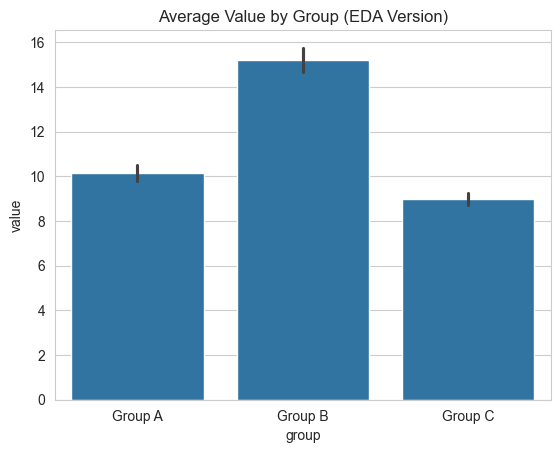

In [25]:
# EDA Plot: Good for us, bad for an audience
fig, ax = plt.subplots()
sns.barplot(data=df_groups_bar, x='group', y='value', ax=ax)
ax.set_title("Average Value by Group (EDA Version)")
plt.show()

#### Step 2: The Explanatory Plot (Storytelling)

**Analysis:**
* **Story:** Group B is the clear winner.
* **Gestalt:** We use **Similarity**. We will make Group A and C the *same* color (gray) to group them as "context," and make Group B a *different* color (blue) to make it stand out.
* **Declutter:** We will remove the y-axis label ("value"), the top/right/left spines, and the x-axis tick marks. We will keep a light grid on the y-axis for reference.
* **Preattentive Attributes:** We use **Color** (blue vs. gray) to draw the eye to Group B. We also use **Text** to add the exact values *on* the bars, so the user doesn't have to look at the y-axis. We will add a clear, action-oriented title.

C:\Users\Admin\AppData\Local\Temp\ipykernel_10288\2141372880.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=means, x='group', y='value', ax=ax, palette=colors)


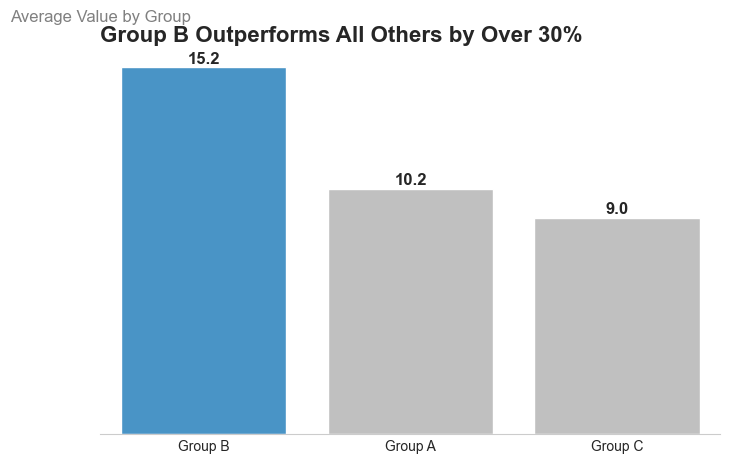

In [26]:
# Explanatory Plot: Clear, simple, focused.

# 1. Prepare Data & Colors
means = df_groups_bar.groupby('group')['value'].mean().reset_index()
means = means.sort_values(by='value', ascending=False) # Sort to make comparison easier
colors = ['#3498db' if x == 'Group B' else '#c0c0c0' for x in means['group']]

# 2. Create Figure and Axes
fig, ax = plt.subplots(figsize=(8, 5))

# 3. Plot (Use the 'palette' parameter for our custom color list)
sns.barplot(data=means, x='group', y='value', ax=ax, palette=colors)

# 4. Customize (Declutter & Focus)

# --- Declutter ---
ax.set_ylabel('') # Remove y-label
ax.set_xlabel('') # Remove x-label
ax.tick_params(axis='x', length=0) # Remove x-axis tick marks
sns.despine(left=True) # Remove top, right, and left spines
ax.grid(axis='y', linestyle='--', alpha=0.7) # Keep a light horizontal grid
ax.set_yticks([]) # Remove y-axis values (we will add labels)

# --- Focus (Preattentive Attributes) ---
# Add data labels (Text)
for i, val in enumerate(means['value']):
    ax.text(i, val + 0.2, f'{val:.1f}', ha='center', fontsize=12, fontweight='bold')

# Add a strong title (Text)
ax.set_title('Group B Outperforms All Others by Over 30%', 
             loc='left', fontsize=16, fontweight='bold')
fig.suptitle('Average Value by Group',  x=0.125, y=0.96, fontsize=12, color='gray')

plt.show()

---

### 3.3. Practical Example 2: Scatter Plot

**Story:** We want to show that while there is a general positive correlation, **Group A** forms a distinct, high-value cluster.

**Data:** We will use the 'long-form' scatter data from Part 2.

In [27]:
# 1. Prepare Data
np.random.seed(123)
x_scatter = np.random.rand(100)
y_scatter = 2 * x_scatter + 1 + np.random.normal(0, 0.2, 100)
group_var = np.random.choice(['Group A', 'Group B'], 100, p=[0.3, 0.7])

# Make Group A a distinct cluster
y_scatter[group_var == 'Group A'] = y_scatter[group_var == 'Group A'] + 2.0

df_scatter = pd.DataFrame({
    'x_var': x_scatter,
    'y_var': y_scatter,
    'group_var': group_var
})

#### Step 1: The EDA Plot (Exploratory)

The default `sns.scatterplot(hue=...)` is an excellent EDA tool. It uses color (a preattentive attribute) to show the groups.

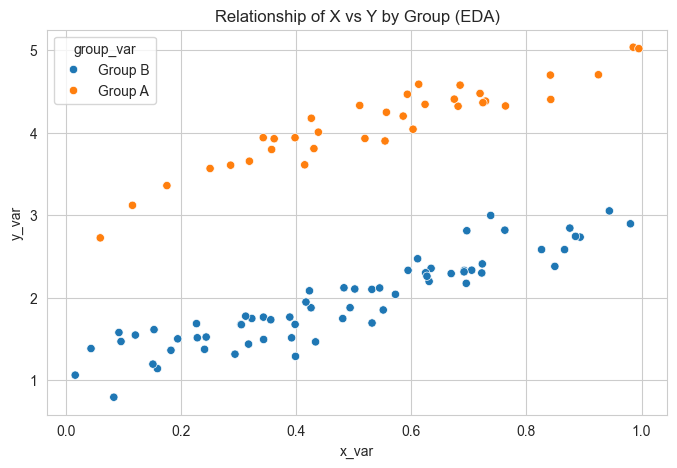

In [28]:
# EDA Plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(data=df_scatter, x='x_var', y='y_var', hue='group_var', ax=ax)
ax.set_title("Relationship of X vs Y by Group (EDA)")
plt.show()

#### Step 2: The Explanatory Plot (Storytelling)

**Analysis:**
* **Story:** Group A is a distinct, high-performing cluster.
* **Gestalt (Similarity):** We use the "Gray-out" technique. We will plot Group B (context) as gray dots. We will plot Group A (story) as blue dots.
* **Declutter:** Remove the default Seaborn legend (it's redundant). Remove top/right spines. Lighten the grid.
* **Preattentive Attributes:** 
    * **Color:** Group A (blue) vs Group B (gray).
    * **Enclosure (via Text):** Instead of a box, we will use `ax.annotate()` to draw an arrow and label the entire "Group A" cluster, making it a clear visual group.

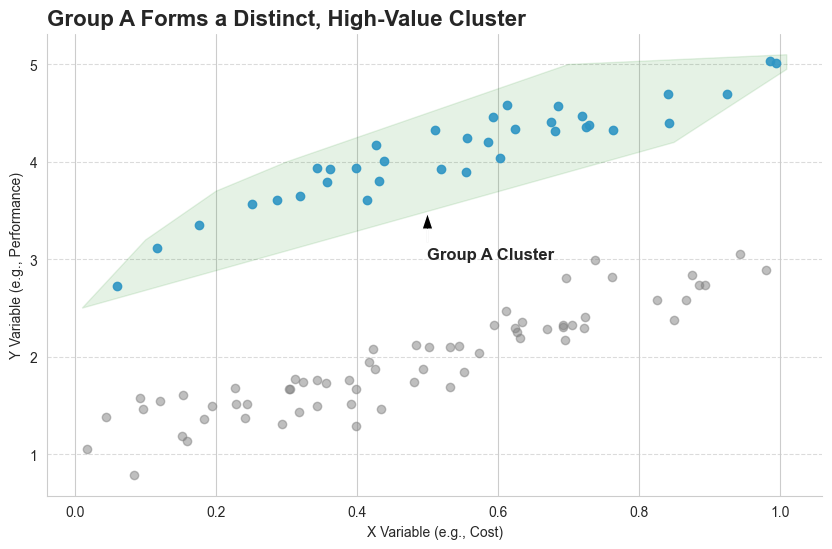

In [29]:
# Explanatory Plot

# 1. Prepare Data (split data for layering)
df_a = df_scatter[df_scatter['group_var'] == 'Group A']
df_b = df_scatter[df_scatter['group_var'] == 'Group B']

# 2. Create Figure and Axes
fig, ax = plt.subplots(figsize=(10, 6))

# 3. Plot (in layers)
# Plot the 'context' (Group B) first, in gray and semi-transparent
ax.scatter(df_b['x_var'], df_b['y_var'], color='gray', alpha=0.5, label='Group B')

# Plot the 'story' (Group A) on top, in blue and opaque
ax.scatter(df_a['x_var'], df_a['y_var'], color='#3498db', alpha=0.9, label='Group A')

# 4. Customize (Declutter & Focus)

# --- Declutter ---
ax.set_title("Group A Forms a Distinct, High-Value Cluster", loc='left', fontsize=16, fontweight='bold')
ax.set_xlabel("X Variable (e.g., Cost)")
ax.set_ylabel("Y Variable (e.g., Performance)")
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.7)
pgon = plt.Polygon([[0.01, 2.5],[0.1,3.2],[0.2,3.7],[0.3,4], [0.7, 5], [1.01, 5.1],[1.01, 4.95],[0.85,4.2]],
                   color="green", alpha=0.1)
ax.add_patch(pgon)
# --- Focus (Preattentive Attributes) ---
# Add a text label and arrow to point to the cluster
ax.annotate('Group A Cluster', 
            xy=(0.5, 3.5),  # The point to annotate
            xytext=(0.5, 3), # The location of the text
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
            fontsize=12, fontweight='bold'
           )

# We can create a simple, clean legend manually or just use annotations
# ax.legend() # This time we used annotations instead of a legend

plt.show()

---

### 3.4. Practical Example 3: Box Plot

**Story:** We want to show that while the groups are similar, **Group B has significant high-value outliers** that need investigation.

**Data:** We will use the 'long-form' categorical data from Part 2.

In [30]:
# 1. Prepare Data
np.random.seed(10)
group_a = np.random.normal(10, 2, 100)
group_b = np.random.normal(10.5, 2, 100) # Similar median to A
group_c = np.random.normal(9, 1.5, 100)
# Add significant outliers to Group B
group_b = np.concatenate([group_b, [25, 27, 30]])
group_a = np.concatenate([group_a, [2, 3, 1]]) # Add some low outliers to A
group_c = np.concatenate([group_c, [18]]) # Add one high outlier to C

df_groups_box = pd.DataFrame({
    'value': np.concatenate([group_a, group_b, group_c]),
    'group': (['Group A'] * 103) + (['Group B'] * 103) + (['Group C'] * 101)
})

#### Step 1: The EDA Plot (Exploratory)

The default `sns.boxplot` shows all outliers, but treats them all equally. It's hard to see *which* group's outliers we should care about.

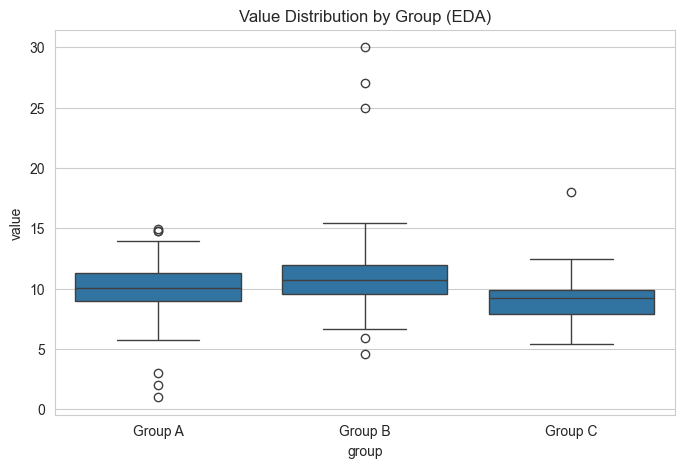

In [31]:
# EDA Plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df_groups_box, x='group', y='value', ax=ax)
ax.set_title("Value Distribution by Group (EDA)")
plt.show()

#### Step 2: The Explanatory Plot (Storytelling)

**Analysis:**
* **Story:** The groups' medians are similar, but Group B's high-value outliers are a critical finding.
* **Gestalt (Similarity/Proximity):** By plotting the outliers as separate points (`stripplot`), we can use **Similarity** (color) to group them. We will make the "context" outliers (A & C) gray, and the "story" outliers (B) red and larger.
* **Declutter:** We will remove the boxes (`showbox=False`) and whiskers (`showcaps=False`) to focus *only* on the outliers and medians. We remove spines and y-axis labels.
* **Preattentive Attributes:** 
    * **Color:** Group B outliers (red) vs. all other points (gray).
    * **Size:** Make Group B outliers larger (`s=10`).
    * **Text:** Add a title that *tells the story*. Add an annotation pointing directly to the problem outliers.

C:\Users\Admin\AppData\Local\Temp\ipykernel_10288\236731894.py:26: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.stripplot(data=df_groups_box, x='group', y='value',


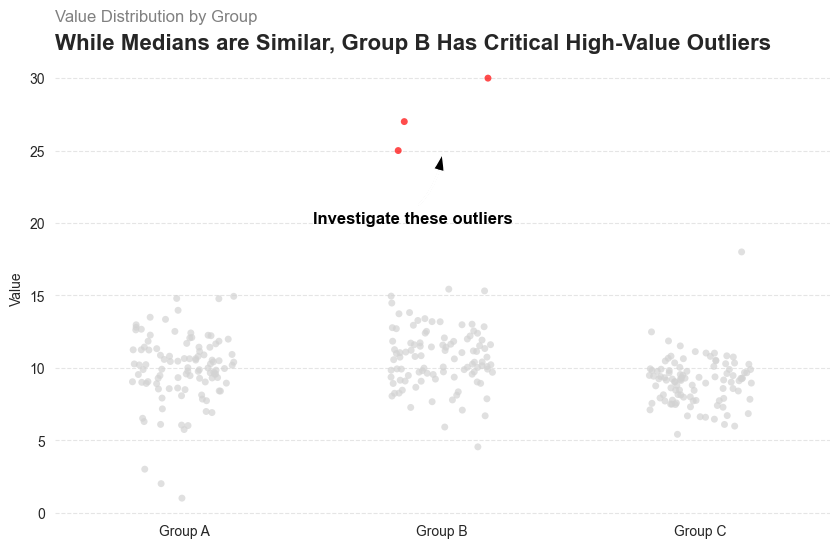

In [32]:
# Explanatory Plot

# 1. Prepare Data (calculate outliers to color them)
Q1 = df_groups_box.groupby('group')['value'].quantile(0.25)
Q3 = df_groups_box.groupby('group')['value'].quantile(0.75)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR

# Map the fences to the dataframe
df_groups_box['upper_fence'] = df_groups_box['group'].map(upper_fence)
df_groups_box['is_outlier'] = df_groups_box['value'] > df_groups_box['upper_fence']

# Create the color/size logic
def get_color(row):
    if row['group'] == 'Group B' and row['is_outlier']:
        return 'red' # The story
    return 'lightgray' # The context

df_groups_box['color'] = df_groups_box.apply(get_color, axis=1)

# 2. Create Figure and Axes
fig, ax = plt.subplots(figsize=(10, 6))

# 3. Plot (Layering)
# We use stripplot to plot every single point, colored by our logic.
sns.stripplot(data=df_groups_box, x='group', y='value', 
              jitter=0.2, alpha=0.7, ax=ax, 
              palette=df_groups_box['color'].unique(), # Use the custom colors
              hue=df_groups_box['color'], # Map colors to hue
              legend=False)

# 4. Customize (Declutter & Focus)
sns.despine(left=True, bottom=True)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_xlabel('')
ax.set_ylabel('Value')
ax.tick_params(axis='x', length=0)

# Add a strong title
ax.set_title("While Medians are Similar, Group B Has Critical High-Value Outliers", 
             loc='left', fontsize=16, fontweight='bold')
fig.suptitle('Value Distribution by Group', ha='left', x=0.125, y=0.96, fontsize=12, color='gray')

# Add annotation to point out the story
ax.annotate('Investigate these outliers', 
            xy=(1, 25), # Point on the chart
            xytext=(0.5, 20), # Text location
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8, connectionstyle="arc3,rad=.2"),
            fontsize=12, color='black', fontweight='bold'
           )

plt.show()

---

### 3.5. Practical Example 4: Line Plot - Highlighting a Peak

**Story:** We want to show a clear spike in a time series and explain its significance.

**Data:** Simulate a stock price with a notable event.

In [33]:
# 1. Prepare Data
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100).cumsum() + 50

# Introduce a peak
peak_day_index = 60
values[peak_day_index] = values[peak_day_index] + 30 # A sudden spike

df_time_series = pd.DataFrame({
    'Date': dates,
    'Value': values
})

#### Step 1: The EDA Plot (Exploratory)

The default line plot shows the data, but the peak's significance is not obvious.

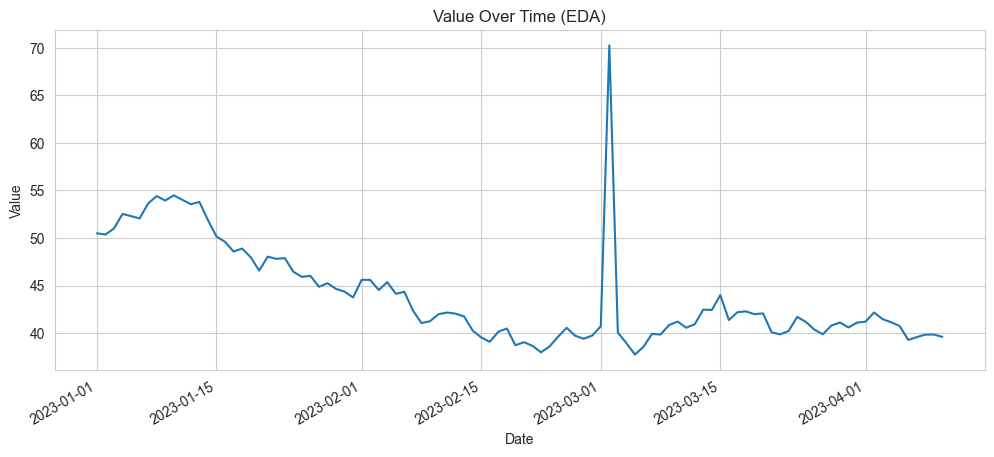

In [34]:
# EDA Plot
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=df_time_series, x='Date', y='Value', ax=ax)
ax.set_title("Value Over Time (EDA)")
fig.autofmt_xdate()
plt.show()

#### Step 2: The Explanatory Plot (Storytelling)

**Analysis:**
* **Story:** A specific event caused a massive, temporary spike in value.
* **Gestalt (Proximity):** We will use `ax.annotate()` to place text *right next to* the peak, connecting the text to the data point.
* **Declutter:** Remove all spines (`sns.despine`), remove x-axis label ("Date") as it's obvious, and lighten the grid.
* **Preattentive Attributes:** 
    * **Color:** Use a neutral color for the line itself and a bright, attention-grabbing color (like red) for the annotation and a marker at the peak.
    * **Size/Shape:** Add a single marker (`'o'`) just for the peak value to make it stand out.

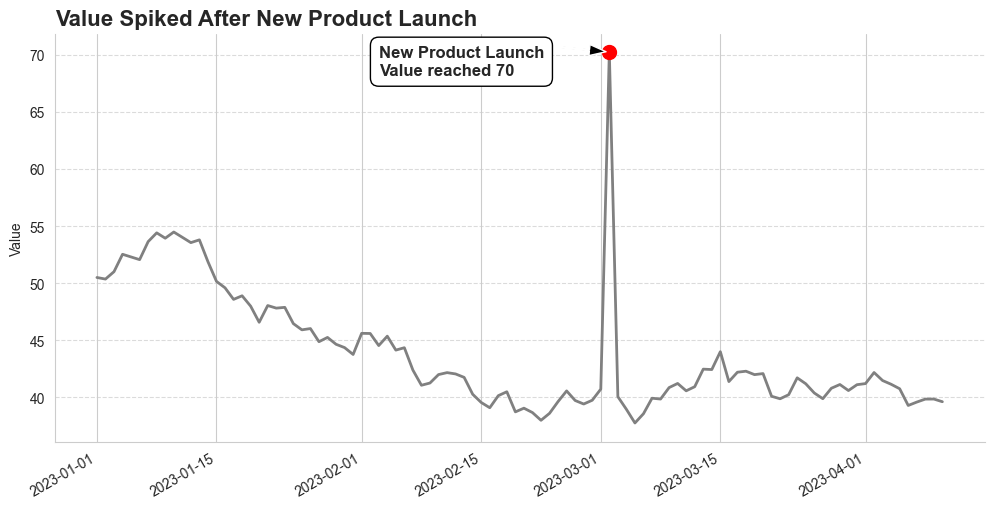

In [35]:
# Explanatory Plot

# 1. Prepare Data (Find the peak)
peak_date = df_time_series.loc[df_time_series['Value'].idxmax(), 'Date']
peak_value = df_time_series['Value'].max()

# 2. Create Figure and Axes
fig, ax = plt.subplots(figsize=(12, 6))

# 3. Plot
sns.lineplot(data=df_time_series, x='Date', y='Value', ax=ax, color='gray', linewidth=2)

# 4. Customize (Declutter & Focus)
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xlabel('')
ax.set_ylabel('Value')
ax.set_title('Value Spiked After New Product Launch', loc='left', fontsize=16, fontweight='bold')

# --- Focus (Preattentive Attributes) ---
# Add a single, colored marker for the peak
ax.plot(peak_date, peak_value, 'o', color='red', markersize=10) 

# Add annotation
ax.annotate(f'New Product Launch\nValue reached {peak_value:.0f}', 
            xy=(peak_date, peak_value), 
            xytext=(peak_date - pd.Timedelta(days=27), peak_value- 2 ), 
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
            fontsize=12, fontweight='bold', 
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="black", lw=1))

fig.autofmt_xdate()
plt.show()

---

### 3.6. Practical Example 5: Line Plot - Training vs. Prediction

**Story:** We want to clearly delineate the historical data used for training a model from its future predictions, and assess how well the predictions align with a known future trend.

**Data:** Simulate a time series, a training period, and a prediction period with a slight deviation.

In [36]:
# 1. Prepare Data
np.random.seed(42)
total_periods = 150
training_periods = 100

dates = pd.date_range(start='2022-01-01', periods=total_periods, freq='D')
actual_values = np.random.randn(total_periods).cumsum() + 100

# Simulate a prediction that slightly deviates
predicted_values = actual_values.copy()
predicted_values[:training_periods] = np.nan # No predictions for training data
predicted_values[training_periods:] = actual_values[training_periods:] + np.linspace(0, 5, total_periods - training_periods) + np.random.normal(0, 1, total_periods - training_periods)
# Add the last known point to the prediction series so the line connects
predicted_values[training_periods - 1] = actual_values[training_periods - 1]

df_full_series = pd.DataFrame({
    'Date': dates,
    'Actual': actual_values,
    'Predicted': predicted_values
})


#### Step 1: The EDA Plot (Exploratory)

A simple EDA plot might just plot all three lines, which can be confusing. It's hard to tell where history ends and a forecast begins.

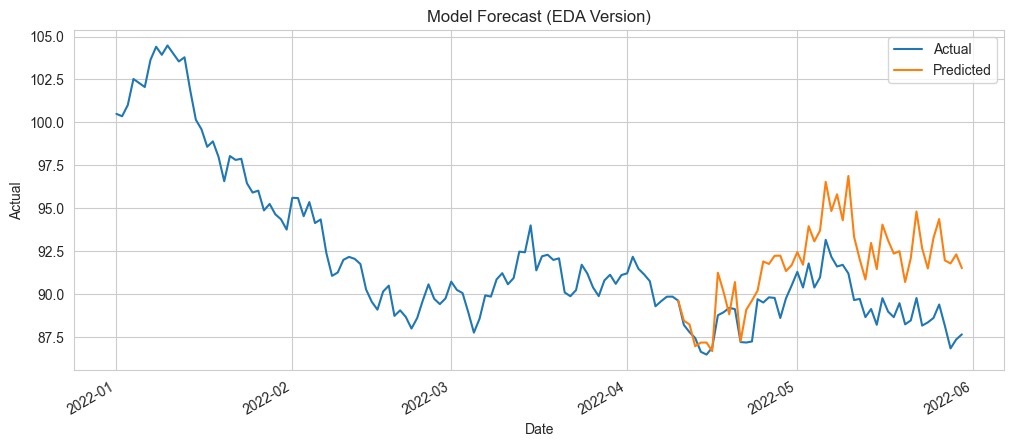

In [37]:
# EDA Plot
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=df_full_series, x='Date', y='Actual', ax=ax, label='Actual')
sns.lineplot(data=df_full_series, x='Date', y='Predicted', ax=ax, label='Predicted')
ax.set_title("Model Forecast (EDA Version)")
ax.legend()
fig.autofmt_xdate()
plt.show()

#### Step 2: The Explanatory Plot (Storytelling)

**Analysis:**
* **Story:** The model's predictions (red) track the actual historical data (green) well, but begin to drift higher than the *actual* future outcome (dashed green).
* **Gestalt (Enclosure):** We will use `ax.axvspan()` to create a shaded gray box over the "Training" period, clearly separating it from the "Prediction" period. This groups all historical data.
* **Gestalt (Similarity/Connection):** We will use line *style* to differentiate. All 'Actual' data will use the same color (green), but the historical part will be a *solid* line (Connection) and the future part will be a *dashed* line. This groups them by similarity but also shows a change in state.
* **Declutter:** Remove top/right spines. Remove the default legend.
* **Preattentive Attributes:** 
    * **Color:** Use distinct colors (green for actual, red for predicted).
    * **Text:** Use `ax.text()` to label the "Training" and "Prediction" zones directly. Also, label the lines directly at the end of the plot instead of using a legend.

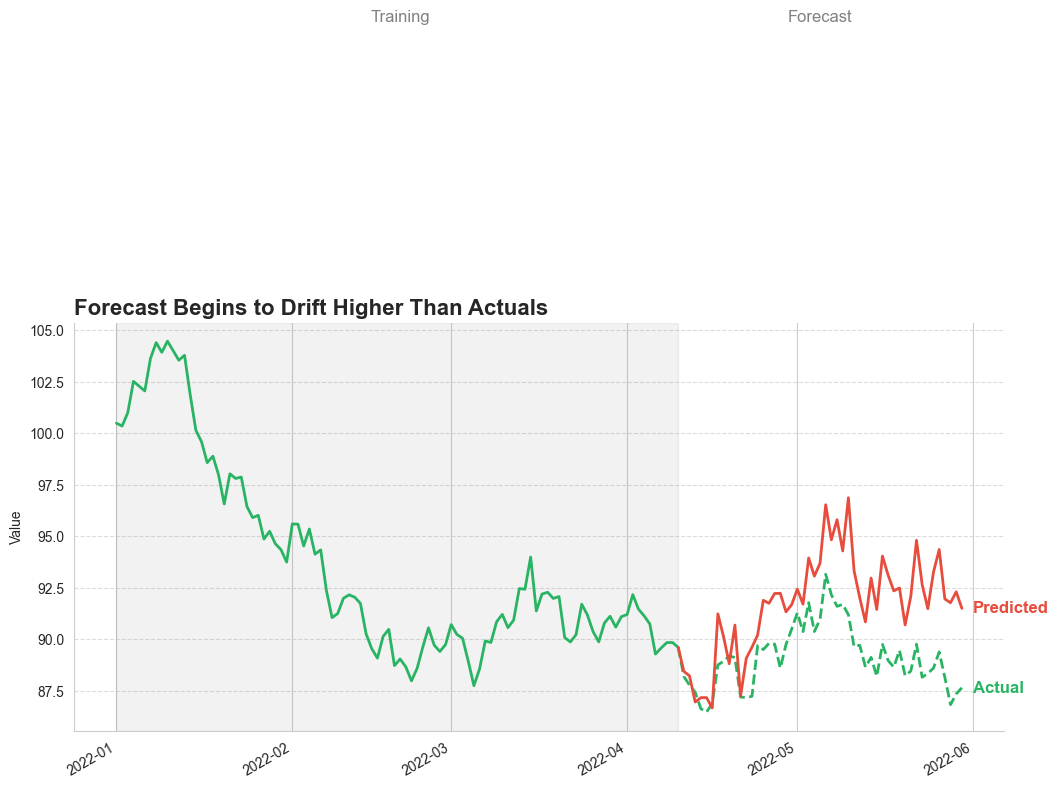

In [38]:
# Explanatory Plot

# 1. Prepare Data
df_train_actual = df_full_series.iloc[:training_periods]
df_future_actual = df_full_series.iloc[training_periods-1:]
df_pred = df_full_series[df_full_series['Predicted'].notna()]
split_date = df_train_actual['Date'].iloc[-1]

# 2. Create Figure and Axes
fig, ax = plt.subplots(figsize=(12, 6))

# 3. Plot (Layering)
# Plot actual training data
ax.plot(df_train_actual['Date'], df_train_actual['Actual'], color='#28b463', linewidth=2)
# Plot actual future data
ax.plot(df_future_actual['Date'], df_future_actual['Actual'], color='#28b463', linestyle='--', linewidth=2)
# Plot predicted data
ax.plot(df_pred['Date'], df_pred['Predicted'], color='#e74c3c', linewidth=2)

# 4. Customize (Declutter & Focus)
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xlabel('')
ax.set_ylabel('Value')
ax.set_title('Forecast Begins to Drift Higher Than Actuals', loc='left', fontsize=16, fontweight='bold')

# --- Focus (Preattentive Attributes) ---
# 1. Gestalt (Enclosure): Add a shaded region for training
ax.axvspan(df_train_actual['Date'].min(), split_date, color='gray', alpha=0.1, label='Training Period')

# 2. Gestalt (Proximity): Add direct labels instead of a legend
ax.text(df_train_actual['Date'].iloc[len(df_train_actual)//2], 120, 'Training', 
        fontsize=12, color='gray', ha='center')
ax.text(df_pred['Date'].iloc[len(df_pred)//2], 120, 'Forecast', 
        fontsize=12, color='gray', ha='center')

# 3. Label lines directly
ax.text(df_full_series['Date'].iloc[-1] + pd.Timedelta(days=2), df_full_series['Actual'].iloc[-1], 'Actual', 
        color='#28b463', fontsize=12, fontweight='bold', va='center')
ax.text(df_full_series['Date'].iloc[-1] + pd.Timedelta(days=2), df_full_series['Predicted'].iloc[-1], 'Predicted', 
        color='#e74c3c', fontsize=12, fontweight='bold', va='center')

fig.autofmt_xdate()
plt.show()

### Part 3: Review Questions

1.  **Question:** What is the *first* thing you should do when converting an EDA chart to an Explanatory chart?
    * **Answer:** **Declutter**. Before you can focus the audience's attention, you must remove all the unnecessary noise (borders, heavy grids, extra labels, default legends) that is distracting them.

2.  **Question:** What is the "Gray-out" technique and which principle does it use?
    * **Answer:** It's the technique of coloring your main story (e.g., one bar, one line) with a single, strong color (like blue) while coloring all other context data in a neutral color (like light gray). It uses the **Gestalt principle of Similarity** (we group the gray items) and the **Preattentive Attribute** of **Color** (our eyes are instantly drawn to the one blue item).

3.  **Question:** Why is `ax.text()` or `ax.annotate()` better than a default `ax.legend()` for an explanatory chart?
    * **Answer:** A legend forces the audience to look back and forth between the plot and the legend. `ax.annotate()` (using the Gestalt principle of **Proximity**) places the explanation *right next to* the data point it describes, reducing the audience's cognitive load and making the message instant.

4.  **Question:** In "Highlighting a Peak" (Example 4), what Matplotlib feature did we use to draw attention to the specific event date?
    * **Answer:** We used `ax.axvline()` to draw a vertical line and `ax.text()` to add a label directly to that line, creating a clear visual cue for the start of the event.

5.  **Question:** In "Training vs. Prediction" (Example 5), what *Gestalt principle* did we use to separate the two time periods?
    * **Answer:** We used the **Principle of Enclosure** by adding a shaded gray rectangle (`ax.axvspan()`) over the entire "Training Period", visually grouping all data points within it as separate from the "Prediction" period.

6.  **Explore Further:** Find a data visualization in a news article (e.g., from The New York Times, The Economist, or FiveThirtyEight). Identify the story they are telling. What did they declutter?

## Part 4: Practical Case Studies

In this section, we will apply everything we've learned to real-world datasets. The goal is to move from a general question to a clean, explanatory chart that tells a story.

In [39]:
# Make sure libraries are imported
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set a consistent style for all plots
sns.set_style("whitegrid")

---

### 4.1. Case Study 1: The 'Tips' Dataset (Detailed Walkthrough)

**Goal:** We are a restaurant consultant. The manager wants to know: "What's the relationship between total bill and tip amount, and does smoking status matter?"

**Story:** We discover that while there's a general trend, **smokers show a much weaker and more erratic relationship between bill and tip** compared to non-smokers.

#### Step 1: Load and Explore (EDA)

In [40]:
# Load the dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


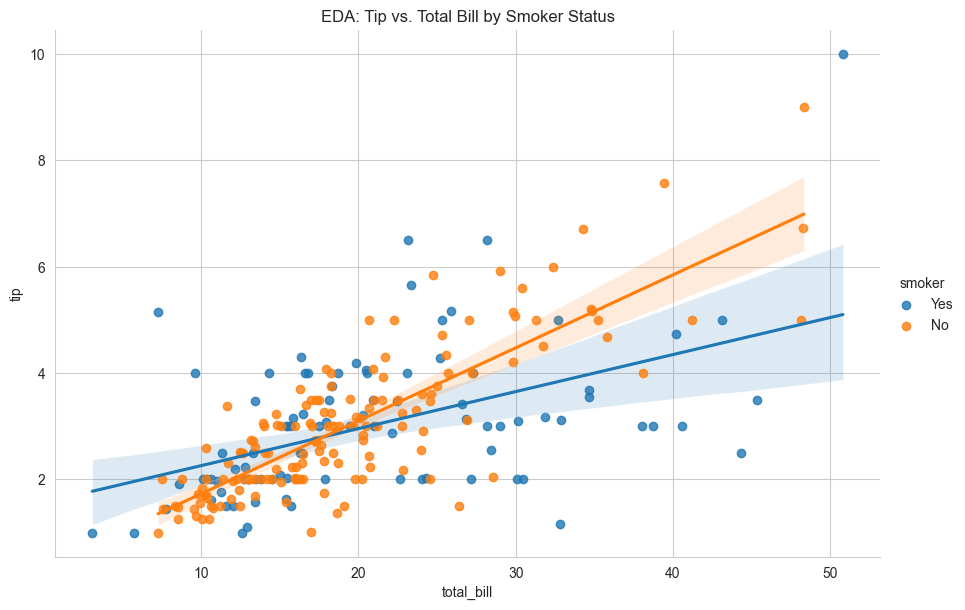

In [41]:
# EDA Plot: Use sns.lmplot (or regplot) to see relationships
# 'lmplot' is a figure-level function that combines regplot and FacetGrid

sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker", 
           height=6, aspect=1.5)
plt.title("EDA: Tip vs. Total Bill by Smoker Status")
plt.show()

#### Step 2: Analyze & Build Explanatory Chart

**Analysis (from EDA plot):**
* **Story:** The non-smoker group (blue) shows a tight, predictable relationship: as the bill goes up, the tip goes up. The smoker group (orange) is all over the place; the relationship is much weaker and more varied.
* **Audience:** Restaurant Manager.
* **Message:** "We can reliably predict tips from non-smokers, but smoker tips are unpredictable."

**Plan:**
1.  **Plot Type:** Keep the `scatterplot` with regression lines, but use `subplots` to separate them for clarity (Gestalt: Proximity).
2.  **Gestalt Principles:** We will use **Similarity**. We'll make both plots follow the same design (shared y-axis, same colors).
3.  **Declutter:** Remove all top/right spines (`sns.despine`). Remove redundant labels. 
4.  **Preattentive Attributes (Text/Color):** Use a strong main title to state the conclusion. Use annotations (`ax.text`) to label "Non-Smokers" and "Smokers" directly on the chart, instead of a legend. Use color consistently (e.g., blue for non-smokers, orange for smokers).

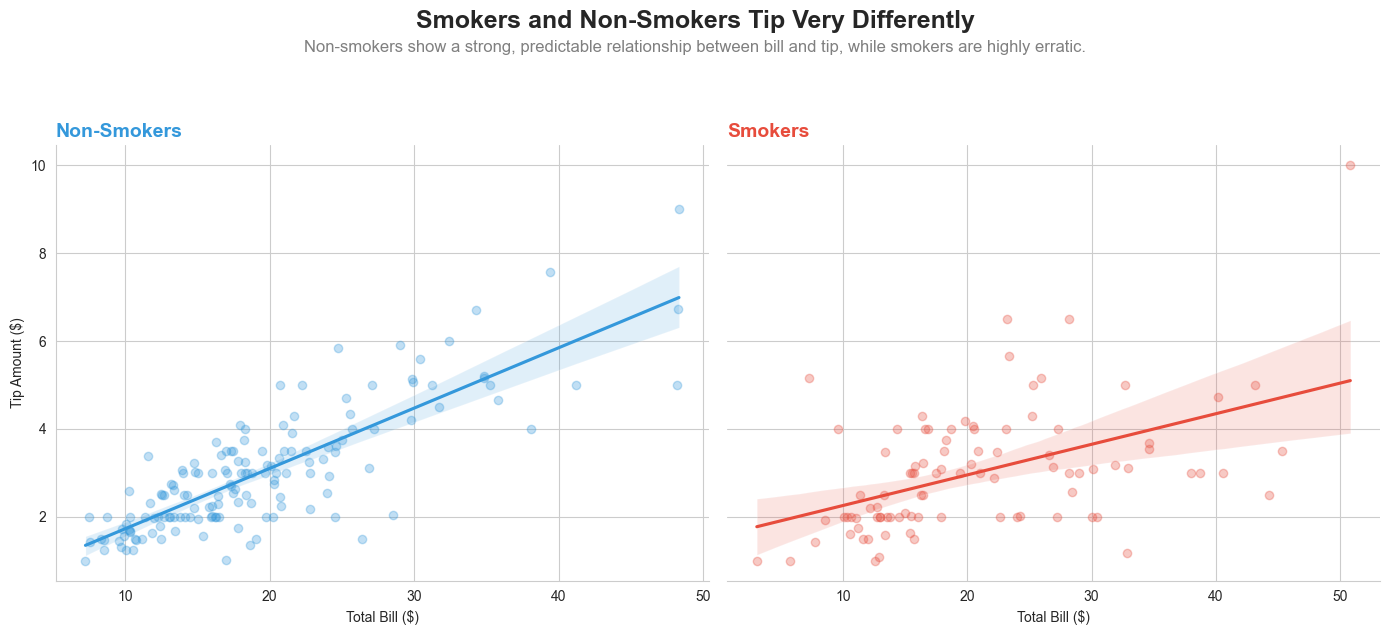

In [42]:
# Explanatory Plot: Telling the story

# 1. Create Figure and Axes (1 row, 2 cols, shared Y-axis)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

fig.suptitle('Smokers and Non-Smokers Tip Very Differently', fontsize=18, fontweight='bold', x=0.5, y=1.05)
plt.figtext(0.5, 0.98, "Non-smokers show a strong, predictable relationship between bill and tip, while smokers are highly erratic.", 
            ha='center', fontsize=12, color='gray')

# --- Plot 1: Non-Smokers (The predictable context) ---
sns.regplot(data=tips[tips['smoker']=='No'], x="total_bill", y="tip", 
            ax=ax1, color='#3498db', scatter_kws={'alpha': 0.3})

# --- Customize Ax 1 (Declutter & Focus) ---
ax1.set_title("Non-Smokers", fontsize=14, loc='left', color='#3498db', fontweight='bold')
ax1.set_xlabel("Total Bill ($)")
ax1.set_ylabel("Tip Amount ($)")
sns.despine(ax=ax1)

# --- Plot 2: Smokers (The story) ---
sns.regplot(data=tips[tips['smoker']=='Yes'], x="total_bill", y="tip", 
            ax=ax2, color='#e74c3c', scatter_kws={'alpha': 0.3})

# --- Customize Ax 2 (Declutter & Focus) ---
ax2.set_title("Smokers", fontsize=14, loc='left', color='#e74c3c', fontweight='bold')
ax2.set_xlabel("Total Bill ($)")
ax2.set_ylabel("") # Remove redundant y-label
sns.despine(ax=ax2, left=True) # Remove left spine as well

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

---

### 4.2. Case Study 2: The 'Titanic' Dataset (Guided Exercise)

**Goal:** Your turn. You are a historian. You want to answer the question: **"What was the relationship between survival, passenger class, and sex?"**

**Story to tell:** "Passengers in First Class had a much higher survival rate than others, and women were prioritized over men in all classes."

In [43]:
# 1. Load Data
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Your Task: Create an Explanatory Chart

1.  **Choose a plot:** A `sns.barplot` is an excellent choice here, as it will automatically calculate the *mean* of `survived` (which is 0 or 1, so the mean is the survival *rate*).
2.  **Set your axes:** 
    * What should be on the x-axis? (Hint: `pclass`)
    * What should be on the y-axis? (Hint: `survived`)
    * How can you show 'sex'? (Hint: `hue='sex'`)
3.  **Declutter & Focus:**
    * Can you change the `pclass` labels `1, 2, 3` to be more descriptive, like `"First Class", "Second Class", "Third Class"`? (Use `ax.set_xticklabels()`)
    * Can you change the `legend` title? (Use `ax.get_legend().set_title('Gender')`)
    * Add a clear title that tells the story.
    * Change the y-label to "Survival Rate" (use `ax.set_ylabel()`).

C:\Users\Admin\AppData\Local\Temp\ipykernel_10288\1064185900.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['First Class', 'Second Class', 'Third Class'])


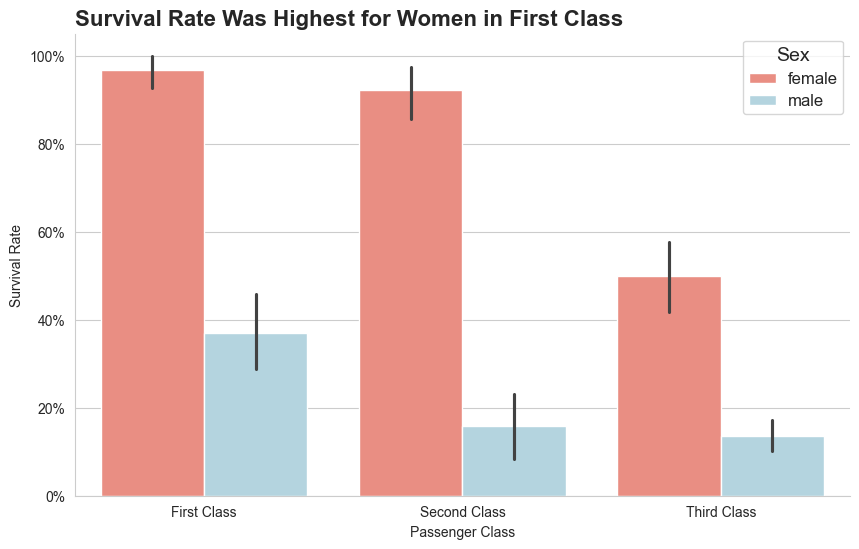

In [44]:
# --- SOLUTION (Try it yourself first!) ---

# 1. Create Figure and Axes
fig, ax = plt.subplots(figsize=(10, 6))

# 2. Plot (Seaborn barplot calculates mean(survived) automatically)
sns.barplot(data=titanic, x='pclass', y='survived', hue='sex', ax=ax, palette={'male': 'lightblue', 'female': 'salmon'})

# 3. Customize (Declutter & Focus)
sns.despine()
ax.set_title('Survival Rate Was Highest for Women in First Class', fontsize=16, fontweight='bold', loc='left')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Survival Rate')

# Customize x-axis labels
ax.set_xticklabels(['First Class', 'Second Class', 'Third Class'])

# Customize legend
legend = ax.get_legend()
legend.set_title('Sex')
plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title

# Format y-axis as percentage
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

plt.show()

---

### 4.3. Case Study 3: The 'Diamonds' Dataset (Guided Exercise)

**Goal:** You are a jeweler. You want to understand: **"How does price relate to carat weight, and how does 'cut' quality affect this?"**

**Story to tell:** "While price increases with carat, the *best* cuts (Premium, Ideal) are not always the most expensive at a given size. The relationship is complex."

In [45]:
# 1. Load Data
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Your Task: Create an Explanatory Chart

This dataset has 53,940 rows. A simple scatter plot will suffer from **overplotting** (too many points stacked on top of each other).

1.  **Prepare Data:** Create a *sample* of the data to plot. (e.g., `df_sample = diamonds.sample(n=2000, random_state=42)`).
2.  **Choose a plot:** A `sns.scatterplot` is correct.
3.  **Set your axes:**
    * x-axis: `carat`
    * y-axis: `price`
    * How to show 'cut'? Try `hue='cut'`. What's the problem? (Too many colors!).
    * Try `size='cut'` or `style='cut'`. Is it better?
4.  **A Better Way (FacetGrid):** What if you use `sns.lmplot()` (which can make facets) with `col='cut'`? This will create 5 separate plots, one for each cut quality. This uses the **Gestalt Principle of Proximity** to group them for comparison.
5.  **Declutter & Focus:**
    * Try using `col_wrap=3` in `lmplot` to make the grid look nicer.
    * Add a single, strong `fig.suptitle()` that tells the story.

d:\CODE\env-teaching\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
d:\CODE\env-teaching\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


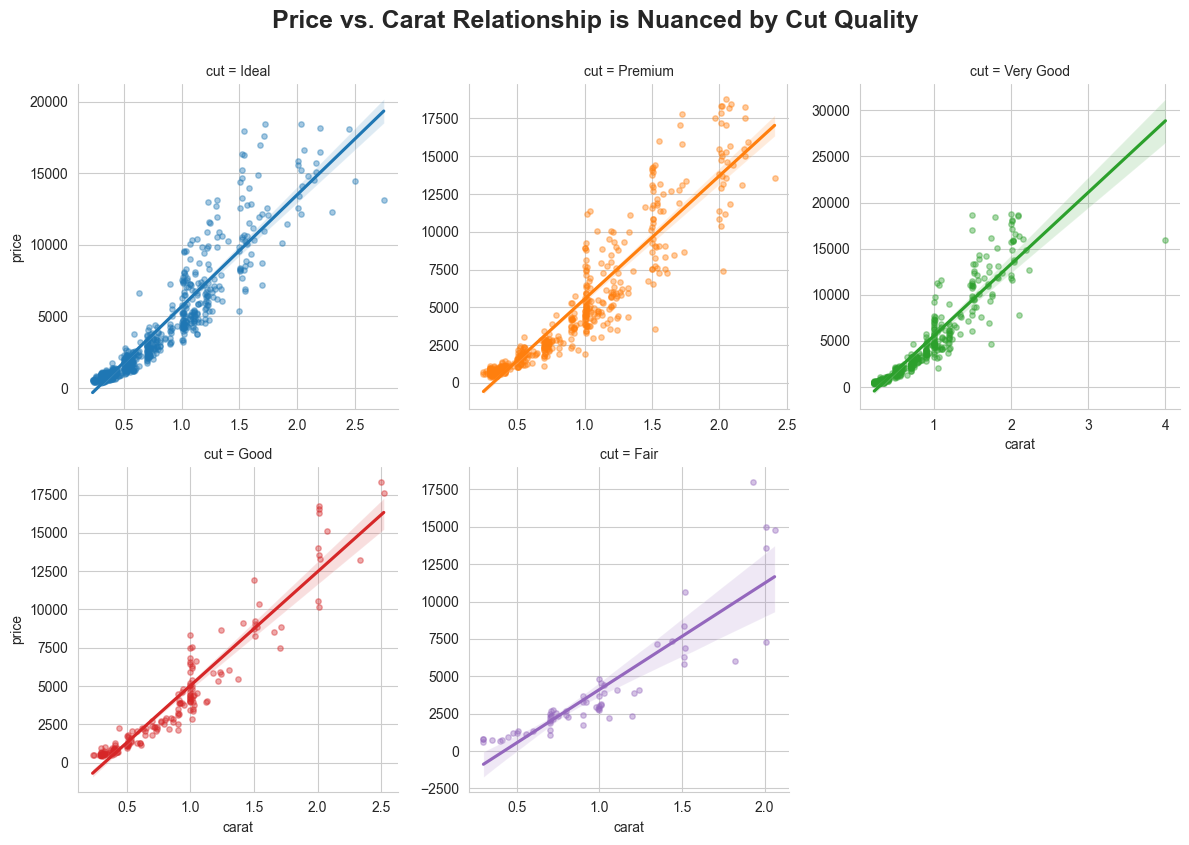

In [46]:
# --- SOLUTION (Try it yourself first!) ---

# 1. Prepare Data (Create a sample to avoid overplotting)
df_sample = diamonds.sample(n=2000, random_state=42)

# 2. Plot (Using sns.lmplot to create facets)
# 'lmplot' is a Figure-level function, so it creates its own figure.
# We use 'col' to create separate plots for each 'cut'.
# 'col_wrap' organizes the 5 plots into a 3x2 grid.
# 'scatter_kws' lets us pass Matplotlib options (like alpha) to the scatter plot.
g = sns.lmplot(
    data=df_sample, 
    x='carat', 
    y='price', 
    col='cut',          # Create columns based on 'cut' category
    col_wrap=3,         # Wrap after 3 plots
    hue='cut',          # Color by 'cut' as well
    height=4, 
    sharex=False,       # Let x-axis vary for each plot
    sharey=False,       # Let y-axis vary for each plot
    scatter_kws={'alpha': 0.4, 's': 15} # Customize the scatter points
)

# 3. Customize (Declutter & Focus)
g.fig.suptitle('Price vs. Carat Relationship is Nuanced by Cut Quality', 
               fontsize=18, fontweight='bold', y=1.05)

plt.show()

---

### Part 4: Review Questions

1.  **Question:** In Case Study 1 (Tips), why did we use `plt.subplots(1, 2, sharey=True)`? What Gestalt principle does this support?
    * **Answer:** We used it to create two separate, side-by-side plots (one for Smokers, one for Non-Smokers). This supports the **Gestalt Principle of Proximity**—by placing them next to each other, we invite the audience to compare them. Using `sharey=True` is critical: it ensures both plots have the same Y-axis scale, making the comparison fair and accurate.

2.  **Question:** In Case Study 2 (Titanic), what is the difference between `sns.barplot` and `sns.countplot`? Why was `barplot` the correct choice?
    * **Answer:** `sns.countplot` simply *counts* the number of rows in each category (e.g., how many male survivors, how many female survivors). `sns.barplot` (by default) calculates the *mean* of a Y-variable for each category. Since 'survived' is 0 or 1, its mean is the *survival rate* (e.g., 74%), which is what the question asked for.

3.  **Question:** What is **overplotting** (seen in Case Study 3) and what are three ways to deal with it?
    * **Answer:** Overplotting is when too many data points are plotted on top of each other, obscuring the true distribution. You can't tell if there are 10 points or 10,000 points in a dark blob.
    * **Fixes:** 
        1.  Use `alpha` (transparency) to see density.
        2.  Plot a random `sample()` of the data (as we did).
        3.  Use a different plot type, like a `sns.jointplot(kind='hex')` (hexbin plot) or `sns.kdeplot` (2D density plot).

4.  **Explore Further:** In Case Study 1, we highlighted outliers by calculating them manually and re-plotting with `sns.stripplot`. This is advanced. A simpler method is to just *overlay* a `stripplot` on a `boxplot` using `jitter`. Try to re-create the Explanatory chart from 3.4 (Example 3: Boxplot) using this simpler, two-line approach: `sns.boxplot(...)` + `sns.stripplot(...)`.

---

## Part 5: Summary and Next Steps

### 5.1. Key Takeaways

1.  **Always use the Object-Oriented (OO) Style:** Start your plots with `fig, ax = plt.subplots()`. This gives you full control and is the standard for complex charts.

2.  **Know Your Purpose (EDA vs. Explanatory):**
    * **EDA (Exploration):** Use plots to *find* the story. Use high-level tools like `sns.pairplot`, `sns.heatmap`, and `sns.histplot(hue=...)` to discover patterns quickly. It's okay for these to be "messy".
    * **Explanatory (Storytelling):** Use plots to *tell* one story. You must be an editor. Start with an EDA plot, then ruthlessly **Declutter** and use **Preattentive Attributes** (like color and text) to guide your audience's eye to the single most important insight.

3.  **Matplotlib + Seaborn = Best Friends:**
    * Use **Seaborn** for the *initial plot* (e.g., `sns.boxplot(ax=ax, ...)`). It saves you time and handles complex statistical grouping (like `hue`) automatically.
    * Use **Matplotlib** for the *final customization* (e.g., `ax.set_title()`, `ax.spines[...]`, `ax.annotate()`). It gives you the low-level control needed for a polished, explanatory chart.

4.  **Charts Have Specific Jobs:** Don't use a pie chart to show a trend over time. Use the right tool for the job. Refer back to the **EDA Purpose Cheatsheet** (Part 1.3) often.

### 5.2. Where to Go From Here?

* **Practice:** The *only* way to get good at visualization is to practice. Pick a dataset (from Seaborn, Kaggle, etc.) and try to tell a story with it. Go through the full EDA -> Explanatory process.

* **Interactive Plots:** This entire lesson focused on *static* plots (images). The next level is *interactive* visualization. Explore libraries like **Plotly** and **Bokeh**, which allow you to create charts with tooltips, zooming, and panning, ideal for web dashboards.

* **Further Reading:** We strongly recommend reading the book "*Storytelling with Data*" by Cole Nussbaumer Knaflic. It is the bible for creating effective explanatory visualizations.